# Raking - Financial Ratios & Stocks


##### Background
We used 17 financial ratios for modeling such as OLS, EMB, XGB, and Equal Weight.

Please note that higher values are considered desirable for some ratios while lower values are considered desirable for the other ratios. For instance, a lower value is interpreted as better for D/E (Debt to Equity) ratio. Let’s say that stock A has a D/E value of 0.5 and stock B has that of 1.2. Then 0.5 is a more desirable number for D/E ratio. It was taken into considerations when ranking stocks using the ratios.

Financial ratios that the higher values considered better are:
- Price to Sales (P/S)
- Price to Earning (P/E)
- Price/Earnings to Growth (PEG)
- Price to Book (P/B)
- Price to Cash Flow (P/CF)
- Price to Free Cash Flows (P/FCF)
- Debt to Equity (D/E)
- Price to Operating Cash Flows (P/OCF)


Financial ratios that the lower values considered better are:
- Profit Margin
- Gross Profit Margin
- Net Profit Margin
- Operating Profit Margin
- Earnings Per Share (EPS)
- Return On Equity (ROE)
- Cash (Liquidity ratio)
- Current (Liquidity ratio)
- Quick (Liquidity ratio)


<br>


##### How Ranking Works
Each stock's values of 17 financial ratios were input for modeling as mentioned earlier. Besides, each ratio is ranked by the 4 different models (OLS, EMB, XGB, and equal weight) and the rankings of ratios were converted to a weight. Then, we multiplied the weight of a ratio with the value of ‘ratio ranking/ total stocks number’ to calculate the stock ranking score for that ratio. A stock ranking score is evaluated per ratio and per quarter for the 4 methods. As a result, each model has stocks ranked on a quarterly basis.

ex)
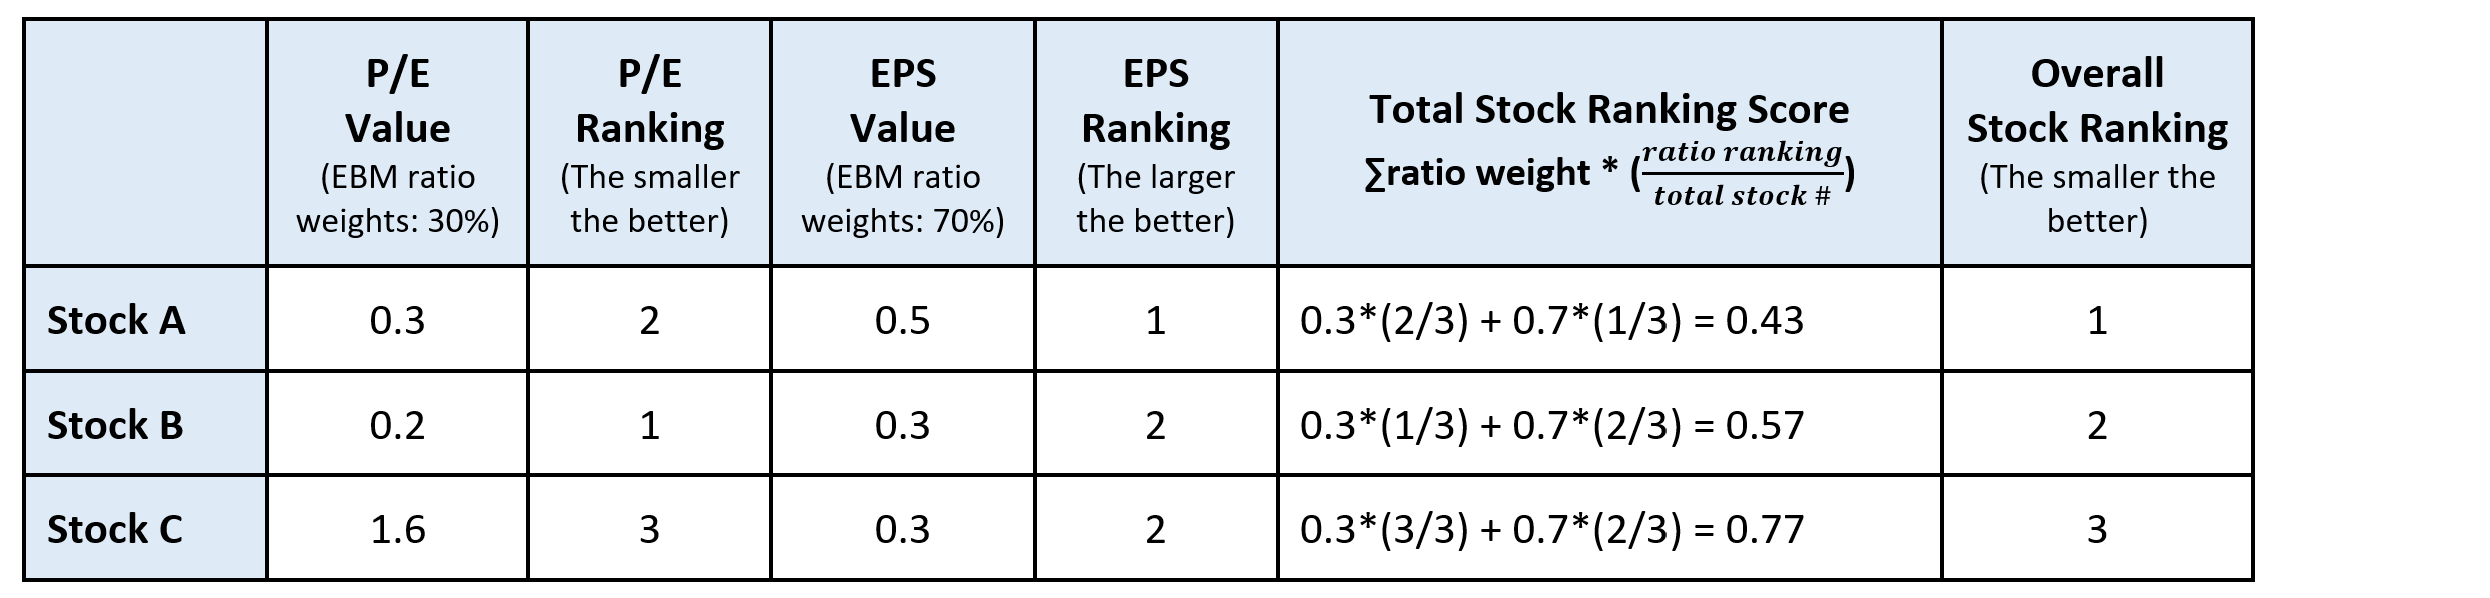



In addition, we assumed that the latest stock data reflects more information. So we gave the 50% weight to the performance from the most recent quarter and the remaining 50% weight to the performance from the past quarters. For example, in order to get the stock ranking for 2022Q1, we gave 50% weights on the stock ranking of 2021Q4 and 50% weights on the stock rankings from 2012Q2 to 2021Q3. 


<br><br>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as sco
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime

In [2]:
# reading in data
df = pd.read_csv("final_removenullvalue_Jun27.csv")


In [140]:
df.head()

,Unnamed: 0,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,...,inventory,totalCurrentAssets,totalAssets,totalCurrentLiabilities,totalLiabilities,totalStockholdersEquity,totalEquity,operatingCashFlow,Annual EPS Growth,PEG Ratio
0,0,2021-12-31,149.860001,154.100006,148.570007,148.960007,148.960007,462400,462400,-0.90,...,59966000.0,747591000.0,1.018826e+09,110357000.0,201258000.0,817568000.0,817568000.0,5805000.0,0.000001,-2.258672e+08
1,1,2021-12-30,144.139999,153.184998,143.860001,150.880005,150.880005,442600,442600,6.74,...,59966000.0,747591000.0,1.018826e+09,110357000.0,201258000.0,817568000.0,817568000.0,5805000.0,0.000001,-2.258672e+08
2,2,2021-12-29,144.820007,146.360001,143.710007,144.729996,144.729996,503700,503700,-0.09,...,59966000.0,747591000.0,1.018826e+09,110357000.0,201258000.0,817568000.0,817568000.0,5805000.0,0.000001,-2.258672e+08
3,3,2021-12-28,144.619995,148.360001,143.261002,144.550003,144.550003,481700,481700,-0.07,...,59966000.0,747591000.0,1.018826e+09,110357000.0,201258000.0,817568000.0,817568000.0,5805000.0,0.000001,-2.258672e+08
4,4,2021-12-27,145.279999,149.000000,143.130005,144.449997,144.449997,341800,341800,-0.83,...,59966000.0,747591000.0,1.018826e+09,110357000.0,201258000.0,817568000.0,817568000.0,5805000.0,0.000001,-2.258672e+08


In [141]:
df.columns

Index(['Unnamed: 0', 'date', 'open', 'high', 'low', 'close', 'adjClose',
       'volume', 'unadjustedVolume', 'change', 'changePercent', 'vwap',
       'changeOverTime', 'Ticker', 'Quarter', 'period', 'priceToBookRatio',
       'priceToSalesRatio', 'priceEarningsRatio', 'priceToFreeCashFlowsRatio',
       'priceToOperatingCashFlowsRatio', 'priceCashFlowRatio',
       'grossProfitMargin', 'operatingProfitMargin', 'pretaxProfitMargin',
       'netProfitMargin', 'returnOnEquity', 'currentRatio', 'quickRatio',
       'cashRatio', 'debtEquityRatio', 'revenue', 'eps',
       'weightedAverageShsOut', 'netIncome', 'shortTermInvestments',
       'cashAndShortTermInvestments', 'netReceivables', 'inventory',
       'totalCurrentAssets', 'totalAssets', 'totalCurrentLiabilities',
       'totalLiabilities', 'totalStockholdersEquity', 'totalEquity',
       'operatingCashFlow', 'Annual EPS Growth', 'PEG Ratio'],
      dtype='object')

In [142]:
df['date'].min()

'2012-01-03'

In [143]:
df['date'].max()

'2022-03-31'

In [144]:
# reading in data
weights_ebm_each = pd.read_csv('pct_chg_weights_ebm_each.csv')
weights_ebm_all = pd.read_csv('weights_ebm_j27.csv')
weights_xgb_each = pd.read_csv('pct_chg_weights_ebm_each.csv')
weights_xgb_all = pd.read_csv('xgb_weight_j25.csv')


In [145]:
# checking null values
weights_ebm_each.isnull().sum()


Unnamed: 0        0
EBM Importance    0
ratio             0
weights           0
ticker            0
Quarter           0
dtype: int64

In [146]:
# dropping null values
weights_ebm_each.dropna(inplace = True)


In [147]:
# checking null values
weights_ebm_each.isnull().sum()


Unnamed: 0        0
EBM Importance    0
ratio             0
weights           0
ticker            0
Quarter           0
dtype: int64

In [148]:
weights_ebm_each.head(2)


,Unnamed: 0,EBM Importance,ratio,weights,ticker,Quarter
0,priceToBookRatio,1.084202e-19,priceToBookRatio,0.150943,AMN,2012Q1
1,priceToSalesRatio,1.084202e-19,priceToSalesRatio,0.150943,AMN,2012Q1


In [149]:
weights_ebm_all.head(2)


,Unnamed: 0,EBM Importance,ratio,weights,Quarter
0,grossProfitMargin,0.000081,grossProfitMargin,0.076843,2012Q1
1,pretaxProfitMargin,0.000079,pretaxProfitMargin,0.075308,2012Q1


In [150]:
weights_xgb_each.head(2)


,Unnamed: 0,EBM Importance,ratio,weights,ticker,Quarter
0,priceToBookRatio,1.084202e-19,priceToBookRatio,0.150943,AMN,2012Q1
1,priceToSalesRatio,1.084202e-19,priceToSalesRatio,0.150943,AMN,2012Q1


In [151]:
weights_xgb_each.isnull().sum()


Unnamed: 0        0
EBM Importance    0
ratio             0
weights           0
ticker            0
Quarter           0
dtype: int64

In [152]:
weights_xgb_each.dropna(inplace = True)


In [153]:
weights_xgb_each.isnull().sum()


Unnamed: 0        0
EBM Importance    0
ratio             0
weights           0
ticker            0
Quarter           0
dtype: int64

In [154]:
weights_xgb_all.head(2)


,Unnamed: 0,MXGB Importance,ratio,weights,Quarter
0,priceToBookRatio,0.000652,priceToBookRatio,0.550488,2012Q1
1,debtEquityRatio,0.000533,debtEquityRatio,0.449512,2012Q1


In [155]:
weights_ebm_all.isnull().sum()


Unnamed: 0        0
EBM Importance    0
ratio             0
weights           0
Quarter           0
dtype: int64

In [156]:
targets_ebm_each = weights_ebm_each['ticker'].unique()
print(len(targets_ebm_each))


1


In [157]:
targets_xgb_each = weights_xgb_each['ticker'].unique()
print(len(targets_xgb_each))


1


In [158]:
#pd.set_option("display.max_rows", None)

In [159]:
#pd.options.display.max_rows = 20

In [160]:
df.isnull().sum()

Unnamed: 0                        0
date                              0
open                              0
high                              0
low                               0
close                             0
adjClose                          0
volume                            0
unadjustedVolume                  0
change                            0
changePercent                     0
vwap                              0
changeOverTime                    0
Ticker                            0
Quarter                           0
period                            0
priceToBookRatio                  0
priceToSalesRatio                 0
priceEarningsRatio                0
priceToFreeCashFlowsRatio         0
priceToOperatingCashFlowsRatio    0
priceCashFlowRatio                0
grossProfitMargin                 0
operatingProfitMargin             0
pretaxProfitMargin                0
netProfitMargin                   0
returnOnEquity                    0
currentRatio                

# choose the last day of each quarter as the benchmark

In [161]:
data1 = df.groupby([df['Quarter'],df['Ticker']],as_index=False).first()
data1.head(10)

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,inventory,totalCurrentAssets,totalAssets,totalCurrentLiabilities,totalLiabilities,totalStockholdersEquity,totalEquity,operatingCashFlow,Annual EPS Growth,PEG Ratio
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,5.354338e+09,1.160364e+10,1.564504e+10,1.091500e+10,1.269856e+10,2.946475e+09,2.946475e+09,2.364210e+08,0.138889,8.688937e+01
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,1.114200e+07,1.105390e+08,1.539110e+08,2.241500e+07,2.761400e+07,1.262970e+08,1.262970e+08,4.993000e+06,-0.175000,-4.833910e+02
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,3.549348e+09,2.560213e+10,6.241580e+10,1.678592e+10,3.687237e+10,2.545369e+10,2.554343e+10,2.224930e+09,-0.281857,-3.303948e+01
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.000000e+00,2.638700e+07,2.651900e+07,6.433000e+06,8.934000e+06,1.758500e+07,1.758500e+07,-5.230000e+06,0.200000,-2.286536e+01
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.000000e+00,6.222200e+07,4.532520e+08,4.672600e+07,3.525720e+08,1.006800e+08,1.006800e+08,4.935000e+06,-0.312500,-1.138475e+02
5,2012Q1,ACHV,14987,2012-03-30,29502.000000,29502.000000,28908.000000,29238.000000,29238.000000,200,...,0.000000e+00,1.145510e+08,1.152210e+08,3.095200e+07,3.709400e+07,7.812700e+07,7.812700e+07,-7.383000e+06,1.310345,-3.782837e+00
6,2012Q1,ADUS,20404,2012-03-30,4.750000,5.000000,4.750000,4.950000,4.950000,16600,...,0.000000e+00,8.899700e+07,1.543850e+08,4.049800e+07,6.724800e+07,8.713700e+07,8.713700e+07,-1.283000e+06,-0.571429,-3.703253e+01
7,2012Q1,ALGN,28529,2012-03-30,27.590000,27.960000,27.450000,27.550000,27.550000,674200,...,1.343400e+07,3.854960e+08,6.704360e+08,1.358280e+08,1.474140e+08,5.230220e+08,5.230220e+08,1.542400e+07,-0.257143,-1.011384e+02
8,2012Q1,ALNY,32224,2012-03-30,11.350000,11.548000,11.010000,11.070000,11.070000,370400,...,0.000000e+00,2.085390e+08,3.402950e+08,6.663800e+07,1.429170e+08,1.973780e+08,1.973780e+08,-3.021500e+07,0.000001,-1.124966e+07
9,2012Q1,AMED,38391,2012-03-30,14.480000,14.700000,14.280000,14.460000,14.460000,334800,...,0.000000e+00,2.379610e+08,8.553800e+08,2.524170e+08,3.254060e+08,5.286510e+08,5.299740e+08,1.187100e+07,-0.307692,-6.370554e+01


In [162]:
data1.date.min()

'2012-03-23'

In [163]:
data1.date.max()

'2022-03-31'

In [164]:
data1.isnull().sum()

Quarter                           0
Ticker                            0
Unnamed: 0                        0
date                              0
open                              0
high                              0
low                               0
close                             0
adjClose                          0
volume                            0
unadjustedVolume                  0
change                            0
changePercent                     0
vwap                              0
changeOverTime                    0
period                            0
priceToBookRatio                  0
priceToSalesRatio                 0
priceEarningsRatio                0
priceToFreeCashFlowsRatio         0
priceToOperatingCashFlowsRatio    0
priceCashFlowRatio                0
grossProfitMargin                 0
operatingProfitMargin             0
pretaxProfitMargin                0
netProfitMargin                   0
returnOnEquity                    0
currentRatio                

## PEG Ratio = (P/E)/Annual EPS Growth
## Annual EPS Growth = (EPS(1)-EPS(0))/EPS(0)

In [165]:
data2 = data1

# choose stock in targets

In [166]:
data2.isnull().sum()

Quarter                           0
Ticker                            0
Unnamed: 0                        0
date                              0
open                              0
high                              0
low                               0
close                             0
adjClose                          0
volume                            0
unadjustedVolume                  0
change                            0
changePercent                     0
vwap                              0
changeOverTime                    0
period                            0
priceToBookRatio                  0
priceToSalesRatio                 0
priceEarningsRatio                0
priceToFreeCashFlowsRatio         0
priceToOperatingCashFlowsRatio    0
priceCashFlowRatio                0
grossProfitMargin                 0
operatingProfitMargin             0
pretaxProfitMargin                0
netProfitMargin                   0
returnOnEquity                    0
currentRatio                

In [167]:
number_each_quarter = data2.groupby(data2['Quarter'],as_index=False)['priceToBookRatio'].count()['priceToBookRatio']
number_each_quarter

0     175
1     175
2     175
3     177
4     184
5     187
6     187
7     192
8     195
9     198
10    203
11    210
12    209
13    212
14    216
15    221
16    223
17    227
18    231
19    234
20    232
21    234
22    236
23    239
24    243
25    245
26    247
27    257
28    262
29    270
30    277
31    288
32    292
33    294
34    307
35    328
36    322
37    333
38    343
39    316
40    340
Name: priceToBookRatio, dtype: int64

In [168]:
periods = data2.Quarter.unique()
periods

array(['2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2',
       '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4',
       '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2',
       '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4',
       '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
       '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4',
       '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1'], dtype=object)

In [169]:
data2.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,inventory,totalCurrentAssets,totalAssets,totalCurrentLiabilities,totalLiabilities,totalStockholdersEquity,totalEquity,operatingCashFlow,Annual EPS Growth,PEG Ratio
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,5.354338e+09,1.160364e+10,1.564504e+10,1.091500e+10,1.269856e+10,2.946475e+09,2.946475e+09,2.364210e+08,0.138889,86.889365
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,1.114200e+07,1.105390e+08,1.539110e+08,2.241500e+07,2.761400e+07,1.262970e+08,1.262970e+08,4.993000e+06,-0.175000,-483.391040
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,3.549348e+09,2.560213e+10,6.241580e+10,1.678592e+10,3.687237e+10,2.545369e+10,2.554343e+10,2.224930e+09,-0.281857,-33.039482
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.000000e+00,2.638700e+07,2.651900e+07,6.433000e+06,8.934000e+06,1.758500e+07,1.758500e+07,-5.230000e+06,0.200000,-22.865361
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.000000e+00,6.222200e+07,4.532520e+08,4.672600e+07,3.525720e+08,1.006800e+08,1.006800e+08,4.935000e+06,-0.312500,-113.847452


pd.set_option("display.max_rows", None)

data2 = data2.drop(columns = 'priceToBookRatio Ranking Score')

data2.dtypes

# eps,'cashRatio','quickRatio','currentRatio','returnOnEquity','netProfitMargin','pretaxProfitMargin','operatingProfitMargin'
# 'grossProfitMargin' higher is better

In [170]:
thre1 = df.where(df['priceToBookRatio']>=0).max()['priceToBookRatio']
thre2 = df.where(df['priceToSalesRatio']>=0).max()['priceToSalesRatio']
thre3 = df.where(df['priceEarningsRatio']>=0).max()['priceEarningsRatio']
thre4 = df.where(df['priceToFreeCashFlowsRatio']>=0).max()['priceToFreeCashFlowsRatio']
thre5 = df.where(df['priceToOperatingCashFlowsRatio']>=0).max()['priceToOperatingCashFlowsRatio']
thre6 = df.where(df['priceCashFlowRatio']>=0).max()['priceCashFlowRatio']
thre7 = df.where(df['grossProfitMargin']>=0).max()['grossProfitMargin']
thre8 = df.where(df['operatingProfitMargin']>=0).max()['operatingProfitMargin']
thre9 = df.where(df['pretaxProfitMargin']>=0).max()['pretaxProfitMargin']
thre10 = df.where(df['netProfitMargin']>=0).max()['netProfitMargin']
thre11 = df.where(df['returnOnEquity']>=0).max()['returnOnEquity']
thre12 = df.where(df['currentRatio']>=0).max()['currentRatio']
thre13 = df.where(df['quickRatio']>=0).max()['quickRatio']
thre14 = df.where(df['cashRatio']>=0).max()['cashRatio']
thre15 = df.where(df['debtEquityRatio']>=0).max()['debtEquityRatio']
thre16 = df.where(df['eps']>=0).max()['eps']
thre17 = df.where(df['PEG Ratio']>=0).max()['PEG Ratio']


# lower is better, positive > negative, if negative, lower is better -100 better than -5

In [171]:
df.loc[df['priceToSalesRatio'] < 0, 'priceToSalesRatio'] = df[df['priceToSalesRatio']<0]['priceToSalesRatio']-thre2
df['priceToSalesRatio'] = df['priceToSalesRatio'].abs()
df.loc[df['priceEarningsRatio'] < 0, 'priceEarningsRatio'] = df[df['priceEarningsRatio']<0]['priceEarningsRatio']-thre3
df['priceEarningsRatio'] = df['priceEarningsRatio'].abs()
df.loc[df['priceToFreeCashFlowsRatio'] < 0, 'priceToFreeCashFlowsRatio'] = df[df['priceToFreeCashFlowsRatio']<0]['priceToFreeCashFlowsRatio']-thre4
df['priceToFreeCashFlowsRatio'] = df['priceToFreeCashFlowsRatio'].abs()
df.loc[df['priceToOperatingCashFlowsRatio'] < 0, 'priceToOperatingCashFlowsRatio'] = df[df['priceToOperatingCashFlowsRatio']<0]['priceToOperatingCashFlowsRatio']-thre5
df['priceToOperatingCashFlowsRatio'] = df['priceToOperatingCashFlowsRatio'].abs()
df.loc[df['priceCashFlowRatio'] < 0, 'priceCashFlowRatio'] = df[df['priceCashFlowRatio']<0]['priceCashFlowRatio']-thre6
df['priceCashFlowRatio'] = df['priceCashFlowRatio'].abs()

In [172]:
df.isnull().sum()

Unnamed: 0                        0
date                              0
open                              0
high                              0
low                               0
close                             0
adjClose                          0
volume                            0
unadjustedVolume                  0
change                            0
changePercent                     0
vwap                              0
changeOverTime                    0
Ticker                            0
Quarter                           0
period                            0
priceToBookRatio                  0
priceToSalesRatio                 0
priceEarningsRatio                0
priceToFreeCashFlowsRatio         0
priceToOperatingCashFlowsRatio    0
priceCashFlowRatio                0
grossProfitMargin                 0
operatingProfitMargin             0
pretaxProfitMargin                0
netProfitMargin                   0
returnOnEquity                    0
currentRatio                

# higher is better, positive > negative, if negative, higher is better -5 better than -100

# ['grossProfitMargin'],['operatingProfitMargin'],['pretaxProfitMargin'],['netProfitMargin'],['returnOnEquity'],['eps']

In [173]:
t1 = df[df['grossProfitMargin']<=0]['grossProfitMargin'].abs().max()
t2 = df[df['operatingProfitMargin']<=0]['operatingProfitMargin'].abs().max()
t3 = df[df['pretaxProfitMargin']<=0]['pretaxProfitMargin'].abs().max()
t4 = df[df['netProfitMargin']<=0]['netProfitMargin'].abs().max()
t5 = df[df['returnOnEquity']<=0]['returnOnEquity'].abs().max()
t6 = df[df['eps']<=0]['eps'].abs().max()

In [174]:
df.loc[df['grossProfitMargin'] > 0, 'grossProfitMargin'] = df[df['grossProfitMargin']<0]['grossProfitMargin']+t1
df['grossProfitMargin'] = df['grossProfitMargin'].abs()
df.loc[df['operatingProfitMargin'] > 0, 'operatingProfitMargin'] = df[df['operatingProfitMargin']<0]['operatingProfitMargin']+t2
df['operatingProfitMargin'] = df['operatingProfitMargin'].abs()
df.loc[df['pretaxProfitMargin'] > 0, 'pretaxProfitMargin'] = df[df['pretaxProfitMargin']<0]['pretaxProfitMargin']+t3
df['pretaxProfitMargin'] = df['pretaxProfitMargin'].abs()
df.loc[df['netProfitMargin'] > 0, 'netProfitMargin'] = df[df['netProfitMargin']<0]['netProfitMargin']+t4
df['netProfitMargin'] = df['netProfitMargin'].abs()
df.loc[df['returnOnEquity'] > 0, 'returnOnEquity'] = df[df['returnOnEquity']<0]['returnOnEquity']+t5
df['returnOnEquity'] = df['returnOnEquity'].abs()
df.loc[df['eps'] > 0, 'eps'] = df[df['eps']<0]['eps']+t6
df['eps'] = df['eps'].abs()

In [175]:
df.isnull().sum()

Unnamed: 0                             0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
adjClose                               0
volume                                 0
unadjustedVolume                       0
change                                 0
changePercent                          0
vwap                                   0
changeOverTime                         0
Ticker                                 0
Quarter                                0
period                                 0
priceToBookRatio                       0
priceToSalesRatio                      0
priceEarningsRatio                     0
priceToFreeCashFlowsRatio              0
priceToOperatingCashFlowsRatio         0
priceCashFlowRatio                     0
grossProfitMargin                 532253
operatingProfitMargin             349778
pretaxProfitMarg

In [176]:
# f represent a financial ratio
f1=pd.DataFrame()
f2=pd.DataFrame()
f3=pd.DataFrame()
f4=pd.DataFrame()
f5=pd.DataFrame()
f6=pd.DataFrame()
f7=pd.DataFrame()
f8=pd.DataFrame()
f9=pd.DataFrame()
f10=pd.DataFrame()
f11=pd.DataFrame()
f12=pd.DataFrame()
f13=pd.DataFrame()
f14=pd.DataFrame()
f15=pd.DataFrame()
f16=pd.DataFrame()
f17=pd.DataFrame()

# m is the ranking of each ratio
# f is used to store the ranking of each ratio for all stocks
for i in range(len(periods)):
    # p/b ratio = market price per share/book value per share, lower is better, no negative
    m1 = ((data2[data2['Quarter']==periods[i]]['priceToBookRatio'].rank()/number_each_quarter[i])).to_frame()
    # p/s ratio = market capitalization/annual revenue, lower is better, positive > negative, if negative, lower is better -100 better than -5
    m2 = ((data2[data2['Quarter']==periods[i]]['priceToSalesRatio'].rank()/number_each_quarter[i])).to_frame()
    # p/e ratio = market price per share/earning per share, lower is better, positive > negative, if negative, lower is better -100 better than -5
    m3 = ((data2[data2['Quarter']==periods[i]]['priceEarningsRatio'].rank()/number_each_quarter[i])).to_frame()# positive > negative, if negative, lower is better -100 better than -5
    # p to fcf ratio = market capitalization/free cash flow, lower is better, positive > negative, if negative, lower is better -100 better than -5
    m4 = ((data2[data2['Quarter']==periods[i]]['priceToFreeCashFlowsRatio'].rank()/number_each_quarter[i])).to_frame()
    # p/cf = share price/operating cash flow per share, lower is better, positive > negative, if negative, lower is better -100 better than -5
    m5 = ((data2[data2['Quarter']==periods[i]]['priceToOperatingCashFlowsRatio'].rank()/number_each_quarter[i])).to_frame()
    # p/cf = share price/operating cash flow per share, lower is better, positive > negative, if negative, lower is better -100 better than -5
    m6 = ((data2[data2['Quarter']==periods[i]]['priceCashFlowRatio'].rank()/number_each_quarter[i])).to_frame()
    # grossProfitMargin=(Revenue-COGS)/Revenue-COGS, higher is better, positive > negative, if negative, higher is better -5 better than -100
    m7 = ((data2[data2['Quarter']==periods[i]]['grossProfitMargin'].rank(ascending=False)/number_each_quarter[i])).to_frame()
    # operatingProfitMargin = Operating profit/total revenue,higher is better, positive > negative, if negative, higher is better -5 better than -100
    m8 = ((data2[data2['Quarter']==periods[i]]['operatingProfitMargin'].rank(ascending=False)/number_each_quarter[i])).to_frame()
    # pretaxProfitMargin = earning before tax/total sales,higher is better, positive > negative, if negative, higher is better -5 better than -100
    m9 = ((data2[data2['Quarter']==periods[i]]['pretaxProfitMargin'].rank(ascending=False)/number_each_quarter[i])).to_frame()
    # netProfitMargin = net income/revenus, higher is better, positive > negative, if negative, higher is better -5 better than -100
    m10 = ((data2[data2['Quarter']==periods[i]]['netProfitMargin'].rank(ascending=False)/number_each_quarter[i])).to_frame()
    # roe = net income/average shareholder equity, higher is better, positive > negative, if negative, higher is better -5 better than -100
    m11 = ((data2[data2['Quarter']==periods[i]]['returnOnEquity'].rank(ascending=False)/number_each_quarter[i])).to_frame()
    # currentRatio = assets/liability, higher is better, no negative
    m12 = ((data2[data2['Quarter']==periods[i]]['currentRatio'].rank(ascending=False)/number_each_quarter[i])).to_frame()
    # quickRatio = (assets-inventory)/liability, higher is better, no negative
    m13 = ((data2[data2['Quarter']==periods[i]]['quickRatio'].rank(ascending=False)/number_each_quarter[i])).to_frame()
    # cashRatio = (cash+Cash Equivalents)/liability, higher is better, no negative
    m14 = ((data2[data2['Quarter']==periods[i]]['cashRatio'].rank(ascending=False)/number_each_quarter[i])).to_frame()
    # debtEquityRatio = liability/equity, lower is better, no negative
    m15 = ((data2[data2['Quarter']==periods[i]]['debtEquityRatio'].rank()/number_each_quarter[i])).to_frame()
    # eps = net earning/number of share, higher is better, positive > negative, if negative, higher is better -5 better than -100
    m16 = ((data2[data2['Quarter']==periods[i]]['eps'].rank(ascending=False)/number_each_quarter[i])).to_frame()
    # PEG raio = P/E / EPS growth
    m17 = ((data2[data2['Quarter']==periods[i]]['PEG Ratio'].rank()/number_each_quarter[i])).to_frame()
    
    
    #print(m)
    f1 = f1.append(m1)
    f2 = f2.append(m2)
    f3 = f3.append(m3)
    f4 = f4.append(m4)
    f5 = f5.append(m5)
    f6 = f6.append(m6)
    f7 = f7.append(m7)
    f8 = f8.append(m8)
    f9 = f9.append(m9)
    f10 = f10.append(m10)
    f11 = f11.append(m11)
    f12 = f12.append(m12)
    f13 = f13.append(m13)
    f14 = f14.append(m14)
    f15 = f15.append(m15)
    f16 = f16.append(m16)
    f17 = f17.append(m17)
    
    
    #print(f)
data2['priceToBookRatio Ranking Score'] = f1   
data2['priceToSalesRatio Ranking Score'] = f2 
data2['priceEarningsRatio Ranking Score'] = f3 
data2['priceToFreeCashFlowsRatio Ranking Score'] = f4 
data2['priceToOperatingCashFlowsRatio Ranking Score'] = f5 
data2['priceCashFlowRatio Ranking Score'] = f6 
data2['grossProfitMargin Ranking Score'] = f7 
data2['operatingProfitMargin Ranking Score'] = f8 
data2['pretaxProfitMargin Ranking Score'] = f9 
data2['netProfitMargin Ranking Score'] = f10 
data2['returnOnEquity Ranking Score'] = f11
data2['currentRatio Ranking Score'] = f12 
data2['quickRatio Ranking Score'] = f13 
data2['cashRatio Ranking Score'] = f14 
data2['debtEquityRatio Ranking Score'] = f15 
data2['eps Ranking Score'] = f16 
data2['PEG Ratio Ranking Score'] = f17 




In [177]:
data2.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,operatingProfitMargin Ranking Score,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.611429,0.594286,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.434286,0.417143,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.268571,0.257143,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.965714,0.680000,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.314286,0.457143,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714


In [178]:
#pd.set_option("display.max_rows", None)

In [179]:
data2.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
quickRatio Ranking Score         0
cashRatio Ranking Score          0
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Length: 65, dtype: int64

In [180]:
data3 = data2[data2['Ticker'].isin(targets_ebm_each)]
data3.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,operatingProfitMargin Ranking Score,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score
12,2012Q1,AMN,48017,2012-03-30,6.27,6.35,6.05,6.06,6.06,125600,...,0.508571,0.548571,0.554286,0.417143,0.657143,0.560000,0.931429,0.908571,0.514286,0.594286
187,2012Q2,AMN,47954,2012-06-29,6.04,6.04,5.91,5.93,5.93,126900,...,0.520000,0.708571,0.611429,0.634286,0.702857,0.594286,0.845714,0.891429,0.611429,0.942857
362,2012Q3,AMN,47891,2012-09-28,9.72,10.07,9.54,10.06,10.06,451900,...,0.514286,0.508571,0.531429,0.325714,0.702857,0.588571,0.954286,0.897143,0.500000,0.131429
537,2012Q4,AMN,47829,2012-12-31,11.29,11.67,11.18,11.55,11.55,250200,...,0.531073,0.525424,0.548023,0.389831,0.683616,0.593220,0.954802,0.853107,0.491525,0.129944
715,2013Q1,AMN,47769,2013-03-28,15.81,15.85,15.69,15.83,15.83,267800,...,0.440217,0.440217,0.478261,0.309783,0.690217,0.625000,0.967391,0.842391,0.437500,0.081522


In [181]:
data4 = data2[data2['Ticker'].isin(targets_xgb_each)]
data4.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,operatingProfitMargin Ranking Score,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score
12,2012Q1,AMN,48017,2012-03-30,6.27,6.35,6.05,6.06,6.06,125600,...,0.508571,0.548571,0.554286,0.417143,0.657143,0.560000,0.931429,0.908571,0.514286,0.594286
187,2012Q2,AMN,47954,2012-06-29,6.04,6.04,5.91,5.93,5.93,126900,...,0.520000,0.708571,0.611429,0.634286,0.702857,0.594286,0.845714,0.891429,0.611429,0.942857
362,2012Q3,AMN,47891,2012-09-28,9.72,10.07,9.54,10.06,10.06,451900,...,0.514286,0.508571,0.531429,0.325714,0.702857,0.588571,0.954286,0.897143,0.500000,0.131429
537,2012Q4,AMN,47829,2012-12-31,11.29,11.67,11.18,11.55,11.55,250200,...,0.531073,0.525424,0.548023,0.389831,0.683616,0.593220,0.954802,0.853107,0.491525,0.129944
715,2013Q1,AMN,47769,2013-03-28,15.81,15.85,15.69,15.83,15.83,267800,...,0.440217,0.440217,0.478261,0.309783,0.690217,0.625000,0.967391,0.842391,0.437500,0.081522


In [182]:
#pd.set_option("display.max_rows", None)

In [183]:
data3.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
quickRatio Ranking Score         0
cashRatio Ranking Score          0
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Length: 65, dtype: int64

In [184]:
data4.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
quickRatio Ranking Score         0
cashRatio Ranking Score          0
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Length: 65, dtype: int64

In [185]:
data3.shape

(41, 65)

In [186]:
data3.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,operatingProfitMargin Ranking Score,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score
12,2012Q1,AMN,48017,2012-03-30,6.27,6.35,6.05,6.06,6.06,125600,...,0.508571,0.548571,0.554286,0.417143,0.657143,0.560000,0.931429,0.908571,0.514286,0.594286
187,2012Q2,AMN,47954,2012-06-29,6.04,6.04,5.91,5.93,5.93,126900,...,0.520000,0.708571,0.611429,0.634286,0.702857,0.594286,0.845714,0.891429,0.611429,0.942857
362,2012Q3,AMN,47891,2012-09-28,9.72,10.07,9.54,10.06,10.06,451900,...,0.514286,0.508571,0.531429,0.325714,0.702857,0.588571,0.954286,0.897143,0.500000,0.131429
537,2012Q4,AMN,47829,2012-12-31,11.29,11.67,11.18,11.55,11.55,250200,...,0.531073,0.525424,0.548023,0.389831,0.683616,0.593220,0.954802,0.853107,0.491525,0.129944
715,2013Q1,AMN,47769,2013-03-28,15.81,15.85,15.69,15.83,15.83,267800,...,0.440217,0.440217,0.478261,0.309783,0.690217,0.625000,0.967391,0.842391,0.437500,0.081522


In [187]:
data4.shape

(41, 65)

In [188]:
data4.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,operatingProfitMargin Ranking Score,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score
12,2012Q1,AMN,48017,2012-03-30,6.27,6.35,6.05,6.06,6.06,125600,...,0.508571,0.548571,0.554286,0.417143,0.657143,0.560000,0.931429,0.908571,0.514286,0.594286
187,2012Q2,AMN,47954,2012-06-29,6.04,6.04,5.91,5.93,5.93,126900,...,0.520000,0.708571,0.611429,0.634286,0.702857,0.594286,0.845714,0.891429,0.611429,0.942857
362,2012Q3,AMN,47891,2012-09-28,9.72,10.07,9.54,10.06,10.06,451900,...,0.514286,0.508571,0.531429,0.325714,0.702857,0.588571,0.954286,0.897143,0.500000,0.131429
537,2012Q4,AMN,47829,2012-12-31,11.29,11.67,11.18,11.55,11.55,250200,...,0.531073,0.525424,0.548023,0.389831,0.683616,0.593220,0.954802,0.853107,0.491525,0.129944
715,2013Q1,AMN,47769,2013-03-28,15.81,15.85,15.69,15.83,15.83,267800,...,0.440217,0.440217,0.478261,0.309783,0.690217,0.625000,0.967391,0.842391,0.437500,0.081522


In [189]:
sort_order = ['priceToBookRatio',
       'priceToSalesRatio', 'priceEarningsRatio', 'priceToFreeCashFlowsRatio',
       'priceToOperatingCashFlowsRatio', 'priceCashFlowRatio',
       'grossProfitMargin', 'operatingProfitMargin', 'pretaxProfitMargin',
       'netProfitMargin', 'returnOnEquity', 'currentRatio', 'quickRatio',
       'cashRatio', 'debtEquityRatio','eps','PEG Ratio']

In [190]:
len(sort_order)

17

In [191]:
custom_dict = {'priceToBookRatio': 0, 'priceToSalesRatio': 1, 'priceEarningsRatio': 2,
              'priceToFreeCashFlowsRatio': 3, 'priceToOperatingCashFlowsRatio': 4, 'priceCashFlowRatio': 5,
              'grossProfitMargin': 6, 'operatingProfitMargin': 7, 'pretaxProfitMargin': 8,
              'netProfitMargin': 9, 'returnOnEquity': 10, 'currentRatio': 11,
              'quickRatio': 12, 'cashRatio': 13, 'debtEquityRatio': 14,
              'eps': 15, 'PEG Ratio': 16} 

weights_ebm_each = weights_ebm_each.sort_values(by=['ratio'], key=lambda x: x.map(custom_dict))
weights_ebm_each = weights_ebm_each.reset_index()
weights_ebm_each.head()


,index,Unnamed: 0,EBM Importance,ratio,weights,ticker,Quarter
0,0,priceToBookRatio,1.084202e-19,priceToBookRatio,0.150943,AMN,2012Q1
1,1,priceToSalesRatio,1.084202e-19,priceToSalesRatio,0.150943,AMN,2012Q1
2,3,priceEarningsRatio,5.421011e-20,priceEarningsRatio,0.075472,AMN,2012Q1
3,15,priceToFreeCashFlowsRatio,0.000000e+00,priceToFreeCashFlowsRatio,0.000000,AMN,2012Q1
4,9,priceToOperatingCashFlowsRatio,2.710505e-20,priceToOperatingCashFlowsRatio,0.037736,AMN,2012Q1


In [192]:


custom_dict = {'priceToBookRatio': 0, 'priceToSalesRatio': 1, 'priceEarningsRatio': 2,
              'priceToFreeCashFlowsRatio': 3, 'priceToOperatingCashFlowsRatio': 4, 'priceCashFlowRatio': 5,
              'grossProfitMargin': 6, 'operatingProfitMargin': 7, 'pretaxProfitMargin': 8,
              'netProfitMargin': 9, 'returnOnEquity': 10, 'currentRatio': 11,
              'quickRatio': 12, 'cashRatio': 13, 'debtEquityRatio': 14,
              'eps': 15, 'PEG Ratio': 16} 

weights_xgb_each = weights_xgb_each.sort_values(by=['ratio'], key=lambda x: x.map(custom_dict))
weights_xgb_each = weights_xgb_each.reset_index()
weights_xgb_each.head()


,index,Unnamed: 0,EBM Importance,ratio,weights,ticker,Quarter
0,0,priceToBookRatio,1.084202e-19,priceToBookRatio,0.150943,AMN,2012Q1
1,1,priceToSalesRatio,1.084202e-19,priceToSalesRatio,0.150943,AMN,2012Q1
2,3,priceEarningsRatio,5.421011e-20,priceEarningsRatio,0.075472,AMN,2012Q1
3,15,priceToFreeCashFlowsRatio,0.000000e+00,priceToFreeCashFlowsRatio,0.000000,AMN,2012Q1
4,9,priceToOperatingCashFlowsRatio,2.710505e-20,priceToOperatingCashFlowsRatio,0.037736,AMN,2012Q1


In [193]:
data3.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,operatingProfitMargin Ranking Score,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score
12,2012Q1,AMN,48017,2012-03-30,6.27,6.35,6.05,6.06,6.06,125600,...,0.508571,0.548571,0.554286,0.417143,0.657143,0.560000,0.931429,0.908571,0.514286,0.594286
187,2012Q2,AMN,47954,2012-06-29,6.04,6.04,5.91,5.93,5.93,126900,...,0.520000,0.708571,0.611429,0.634286,0.702857,0.594286,0.845714,0.891429,0.611429,0.942857
362,2012Q3,AMN,47891,2012-09-28,9.72,10.07,9.54,10.06,10.06,451900,...,0.514286,0.508571,0.531429,0.325714,0.702857,0.588571,0.954286,0.897143,0.500000,0.131429
537,2012Q4,AMN,47829,2012-12-31,11.29,11.67,11.18,11.55,11.55,250200,...,0.531073,0.525424,0.548023,0.389831,0.683616,0.593220,0.954802,0.853107,0.491525,0.129944
715,2013Q1,AMN,47769,2013-03-28,15.81,15.85,15.69,15.83,15.83,267800,...,0.440217,0.440217,0.478261,0.309783,0.690217,0.625000,0.967391,0.842391,0.437500,0.081522


# Total ranking for each quarter using ebm each weights

In [194]:
for i in targets_ebm_each:
    temp = data3[data3['Ticker']==i]
    temp_weights = weights_ebm_each[weights_ebm_each['ticker']==i]['weights']
    data3.loc[data3['Ticker'] == i, 'Total Ranking Score'] = temp_weights.iloc[0]*temp['priceToBookRatio Ranking Score'] + temp_weights.iloc[1]*temp['priceToSalesRatio Ranking Score']+temp_weights.iloc[2]*temp['priceEarningsRatio Ranking Score']+temp_weights.iloc[3]*temp['priceToFreeCashFlowsRatio Ranking Score']+temp_weights.iloc[4]*temp['priceToOperatingCashFlowsRatio Ranking Score']+temp_weights.iloc[5]*temp['priceCashFlowRatio Ranking Score']+temp_weights.iloc[6]*temp['grossProfitMargin Ranking Score']+temp_weights.iloc[7]*temp['operatingProfitMargin Ranking Score']+temp_weights.iloc[8]*temp['pretaxProfitMargin Ranking Score']+temp_weights.iloc[9]*temp['netProfitMargin Ranking Score']+temp_weights.iloc[10]*temp['returnOnEquity Ranking Score']+temp_weights.iloc[11]*temp['currentRatio Ranking Score']+temp_weights.iloc[12]*temp['quickRatio Ranking Score']+temp_weights.iloc[13]*temp['cashRatio Ranking Score']+temp_weights.iloc[14]*temp['debtEquityRatio Ranking Score']+temp_weights.iloc[15]*temp['eps Ranking Score']+temp_weights.iloc[16]*temp['PEG Ratio Ranking Score']

/Users/melisdiken/opt/anaconda3/envs/myenv2/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/melisdiken/opt/anaconda3/envs/myenv2/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [195]:
data3.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score
12,2012Q1,AMN,48017,2012-03-30,6.27,6.35,6.05,6.06,6.06,125600,...,0.548571,0.554286,0.417143,0.657143,0.560000,0.931429,0.908571,0.514286,0.594286,0.515580
187,2012Q2,AMN,47954,2012-06-29,6.04,6.04,5.91,5.93,5.93,126900,...,0.708571,0.611429,0.634286,0.702857,0.594286,0.845714,0.891429,0.611429,0.942857,0.487008
362,2012Q3,AMN,47891,2012-09-28,9.72,10.07,9.54,10.06,10.06,451900,...,0.508571,0.531429,0.325714,0.702857,0.588571,0.954286,0.897143,0.500000,0.131429,0.569919
537,2012Q4,AMN,47829,2012-12-31,11.29,11.67,11.18,11.55,11.55,250200,...,0.525424,0.548023,0.389831,0.683616,0.593220,0.954802,0.853107,0.491525,0.129944,0.561241
715,2013Q1,AMN,47769,2013-03-28,15.81,15.85,15.69,15.83,15.83,267800,...,0.440217,0.478261,0.309783,0.690217,0.625000,0.967391,0.842391,0.437500,0.081522,0.530558


In [196]:
data3.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
cashRatio Ranking Score          0
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Total Ranking Score              0
Length: 66, dtype: int64

In [197]:
data4.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,operatingProfitMargin Ranking Score,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score
12,2012Q1,AMN,48017,2012-03-30,6.27,6.35,6.05,6.06,6.06,125600,...,0.508571,0.548571,0.554286,0.417143,0.657143,0.560000,0.931429,0.908571,0.514286,0.594286
187,2012Q2,AMN,47954,2012-06-29,6.04,6.04,5.91,5.93,5.93,126900,...,0.520000,0.708571,0.611429,0.634286,0.702857,0.594286,0.845714,0.891429,0.611429,0.942857
362,2012Q3,AMN,47891,2012-09-28,9.72,10.07,9.54,10.06,10.06,451900,...,0.514286,0.508571,0.531429,0.325714,0.702857,0.588571,0.954286,0.897143,0.500000,0.131429
537,2012Q4,AMN,47829,2012-12-31,11.29,11.67,11.18,11.55,11.55,250200,...,0.531073,0.525424,0.548023,0.389831,0.683616,0.593220,0.954802,0.853107,0.491525,0.129944
715,2013Q1,AMN,47769,2013-03-28,15.81,15.85,15.69,15.83,15.83,267800,...,0.440217,0.440217,0.478261,0.309783,0.690217,0.625000,0.967391,0.842391,0.437500,0.081522


# Total ranking for each quarter using xgb each weights

In [198]:
for i in targets_xgb_each:
    temp = data4[data4['Ticker']==i]
    temp_weights = weights_xgb_each[weights_xgb_each['ticker']==i]['weights']
    data4.loc[data4['Ticker'] == i, 'Total Ranking Score'] = temp_weights.iloc[0]*temp['priceToBookRatio Ranking Score'] + temp_weights.iloc[1]*temp['priceToSalesRatio Ranking Score']+temp_weights.iloc[2]*temp['priceEarningsRatio Ranking Score']+temp_weights.iloc[3]*temp['priceToFreeCashFlowsRatio Ranking Score']+temp_weights.iloc[4]*temp['priceToOperatingCashFlowsRatio Ranking Score']+temp_weights.iloc[5]*temp['priceCashFlowRatio Ranking Score']+temp_weights.iloc[6]*temp['grossProfitMargin Ranking Score']+temp_weights.iloc[7]*temp['operatingProfitMargin Ranking Score']+temp_weights.iloc[8]*temp['pretaxProfitMargin Ranking Score']+temp_weights.iloc[9]*temp['netProfitMargin Ranking Score']+temp_weights.iloc[10]*temp['returnOnEquity Ranking Score']+temp_weights.iloc[11]*temp['currentRatio Ranking Score']+temp_weights.iloc[12]*temp['quickRatio Ranking Score']+temp_weights.iloc[13]*temp['cashRatio Ranking Score']+temp_weights.iloc[14]*temp['debtEquityRatio Ranking Score']+temp_weights.iloc[15]*temp['eps Ranking Score']+temp_weights.iloc[16]*temp['PEG Ratio Ranking Score']

/Users/melisdiken/opt/anaconda3/envs/myenv2/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/melisdiken/opt/anaconda3/envs/myenv2/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [199]:
data4.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
cashRatio Ranking Score          0
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Total Ranking Score              0
Length: 66, dtype: int64

# Total ranking for each quarter using ebm all weights

In [200]:
data5 = data2.copy()
data5.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,operatingProfitMargin Ranking Score,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.611429,0.594286,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.434286,0.417143,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.268571,0.257143,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.965714,0.680000,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.314286,0.457143,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714


In [201]:
data5.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
quickRatio Ranking Score         0
cashRatio Ranking Score          0
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Length: 65, dtype: int64

In [202]:
targets = data5['Ticker'].unique()
print(len(targets))

370


In [203]:
periods

array(['2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2',
       '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4',
       '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2',
       '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4',
       '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
       '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4',
       '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1'], dtype=object)

In [204]:
weights_ebm_all.head()

,Unnamed: 0,EBM Importance,ratio,weights,Quarter
0,grossProfitMargin,0.000081,grossProfitMargin,0.076843,2012Q1
1,pretaxProfitMargin,0.000079,pretaxProfitMargin,0.075308,2012Q1
2,priceToOperatingCashFlowsRatio,0.000077,priceToOperatingCashFlowsRatio,0.072766,2012Q1
3,priceToFreeCashFlowsRatio,0.000075,priceToFreeCashFlowsRatio,0.071573,2012Q1
4,priceCashFlowRatio,0.000072,priceCashFlowRatio,0.068538,2012Q1


In [205]:
weights_ebm_all

,Unnamed: 0,EBM Importance,ratio,weights,Quarter
0,grossProfitMargin,0.000081,grossProfitMargin,0.076843,2012Q1
1,pretaxProfitMargin,0.000079,pretaxProfitMargin,0.075308,2012Q1
2,priceToOperatingCashFlowsRatio,0.000077,priceToOperatingCashFlowsRatio,0.072766,2012Q1
3,priceToFreeCashFlowsRatio,0.000075,priceToFreeCashFlowsRatio,0.071573,2012Q1
4,priceCashFlowRatio,0.000072,priceCashFlowRatio,0.068538,2012Q1
...,...,...,...,...,...
692,priceToSalesRatio,0.000034,priceToSalesRatio,0.040127,2022Q1
693,cashRatio,0.000033,cashRatio,0.038964,2022Q1
694,priceToBookRatio,0.000033,priceToBookRatio,0.037944,2022Q1
695,pretaxProfitMargin,0.000028,pretaxProfitMargin,0.032913,2022Q1


In [206]:
data5.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,operatingProfitMargin Ranking Score,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.611429,0.594286,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.434286,0.417143,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.268571,0.257143,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.965714,0.680000,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.314286,0.457143,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714


In [207]:
for j in periods:
    temp1 = data5[data5['Quarter']==j]
    for i in targets:
        temp = temp1[temp1['Ticker']==i]
        data5.loc[(data5['Ticker'] == i) & (data5['Quarter']==j), 'Total Ranking Score'] = weights_ebm_all['weights'].iloc[0]*temp['priceToBookRatio Ranking Score'] + weights_ebm_all['weights'].iloc[1]*temp['priceToSalesRatio Ranking Score']+weights_ebm_all['weights'].iloc[2]*temp['priceEarningsRatio Ranking Score']+weights_ebm_all['weights'].iloc[3]*temp['priceToFreeCashFlowsRatio Ranking Score']+weights_ebm_all['weights'].iloc[4]*temp['priceToOperatingCashFlowsRatio Ranking Score']+weights_ebm_all['weights'].iloc[5]*temp['priceCashFlowRatio Ranking Score']+weights_ebm_all['weights'].iloc[6]*temp['grossProfitMargin Ranking Score']+weights_ebm_all['weights'].iloc[7]*temp['operatingProfitMargin Ranking Score']+weights_ebm_all['weights'].iloc[8]*temp['pretaxProfitMargin Ranking Score']+weights_ebm_all['weights'].iloc[9]*temp['netProfitMargin Ranking Score']+weights_ebm_all['weights'].iloc[10]*temp['returnOnEquity Ranking Score']+weights_ebm_all['weights'].iloc[11]*temp['currentRatio Ranking Score']+weights_ebm_all['weights'].iloc[12]*temp['quickRatio Ranking Score']+weights_ebm_all['weights'].iloc[13]*temp['cashRatio Ranking Score']+weights_ebm_all['weights'].iloc[14]*temp['debtEquityRatio Ranking Score']+weights_ebm_all['weights'].iloc[15]*temp['eps Ranking Score']+weights_ebm_all['weights'].iloc[16]*temp['PEG Ratio Ranking Score']

In [208]:
data5.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.594286,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857,0.603272
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.417143,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286,0.587656
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.257143,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286,0.451804
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.680000,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429,0.538001
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.457143,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714,0.641333


In [209]:
data5.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
cashRatio Ranking Score          0
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Total Ranking Score              0
Length: 66, dtype: int64

# Total ranking for each quarter using xgb all weights

In [210]:
data6 = data2.copy()
data6.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,operatingProfitMargin Ranking Score,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.611429,0.594286,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.434286,0.417143,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.268571,0.257143,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.965714,0.680000,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.314286,0.457143,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714


In [211]:
for j in periods:
    temp1 = data6[data6['Quarter']==j]
    for i in targets:
        temp = temp1[temp1['Ticker']==i]
        data6.loc[(data6['Ticker'] == i) & (data6['Quarter']==j), 'Total Ranking Score'] = weights_xgb_all['weights'].iloc[0]*temp['priceToBookRatio Ranking Score'] + weights_xgb_all['weights'].iloc[1]*temp['priceToSalesRatio Ranking Score']+weights_xgb_all['weights'].iloc[2]*temp['priceEarningsRatio Ranking Score']+weights_xgb_all['weights'].iloc[3]*temp['priceToFreeCashFlowsRatio Ranking Score']+weights_xgb_all['weights'].iloc[4]*temp['priceToOperatingCashFlowsRatio Ranking Score']+weights_xgb_all['weights'].iloc[5]*temp['priceCashFlowRatio Ranking Score']+weights_xgb_all['weights'].iloc[6]*temp['grossProfitMargin Ranking Score']+weights_xgb_all['weights'].iloc[7]*temp['operatingProfitMargin Ranking Score']+weights_xgb_all['weights'].iloc[8]*temp['pretaxProfitMargin Ranking Score']+weights_xgb_all['weights'].iloc[9]*temp['netProfitMargin Ranking Score']+weights_xgb_all['weights'].iloc[10]*temp['returnOnEquity Ranking Score']+weights_xgb_all['weights'].iloc[11]*temp['currentRatio Ranking Score']+weights_xgb_all['weights'].iloc[12]*temp['quickRatio Ranking Score']+weights_xgb_all['weights'].iloc[13]*temp['cashRatio Ranking Score']+weights_xgb_all['weights'].iloc[14]*temp['debtEquityRatio Ranking Score']+weights_xgb_all['weights'].iloc[15]*temp['eps Ranking Score']+weights_xgb_all['weights'].iloc[16]*temp['PEG Ratio Ranking Score']

In [212]:
# for i in targets:
#     temp = data6[data6['Ticker']==i]
#     data6.loc[data6['Ticker'] == i, 'Total Ranking Score'] = weights_xgb_all['weights'].iloc[0]*temp['priceToBookRatio Ranking Score'] + weights_xgb_all['weights'].iloc[1]*temp['priceToSalesRatio Ranking Score']+weights_xgb_all['weights'].iloc[2]*temp['priceEarningsRatio Ranking Score']+weights_xgb_all['weights'].iloc[3]*temp['priceToFreeCashFlowsRatio Ranking Score']+weights_xgb_all['weights'].iloc[4]*temp['priceToOperatingCashFlowsRatio Ranking Score']+weights_xgb_all['weights'].iloc[5]*temp['priceCashFlowRatio Ranking Score']+weights_xgb_all['weights'].iloc[6]*temp['grossProfitMargin Ranking Score']+weights_xgb_all['weights'].iloc[7]*temp['operatingProfitMargin Ranking Score']+weights_xgb_all['weights'].iloc[8]*temp['pretaxProfitMargin Ranking Score']+weights_xgb_all['weights'].iloc[9]*temp['netProfitMargin Ranking Score']+weights_xgb_all['weights'].iloc[10]*temp['returnOnEquity Ranking Score']+weights_xgb_all['weights'].iloc[11]*temp['currentRatio Ranking Score']+weights_xgb_all['weights'].iloc[12]*temp['quickRatio Ranking Score']+weights_xgb_all['weights'].iloc[13]*temp['cashRatio Ranking Score']+weights_xgb_all['weights'].iloc[14]*temp['debtEquityRatio Ranking Score']+weights_xgb_all['weights'].iloc[15]*temp['eps Ranking Score']+weights_xgb_all['weights'].iloc[16]*temp['PEG Ratio Ranking Score']

In [213]:
data6.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.594286,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857,0.370032
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.417143,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286,0.809753
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.257143,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286,0.341443
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.680000,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429,0.888227
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.457143,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714,0.591624


In [214]:
data6.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
cashRatio Ranking Score          0
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Total Ranking Score              0
Length: 66, dtype: int64

# Total ranking for each quarter using equal weights

In [215]:
data7 = data2.copy()
data7.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,operatingProfitMargin Ranking Score,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.611429,0.594286,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.434286,0.417143,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.268571,0.257143,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.965714,0.680000,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.314286,0.457143,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714


In [216]:
data7.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
quickRatio Ranking Score         0
cashRatio Ranking Score          0
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Length: 65, dtype: int64

In [217]:
equal_weights = 1/17

In [218]:
for i in targets:
    temp = data7[data7['Ticker']==i]
    data7.loc[data7['Ticker'] == i, 'Total Ranking Score'] = equal_weights*temp['priceToBookRatio Ranking Score'] + equal_weights*temp['priceToSalesRatio Ranking Score']+equal_weights*temp['priceEarningsRatio Ranking Score']+equal_weights*temp['priceToFreeCashFlowsRatio Ranking Score']+equal_weights*temp['priceToOperatingCashFlowsRatio Ranking Score']+equal_weights*temp['priceCashFlowRatio Ranking Score']+equal_weights*temp['grossProfitMargin Ranking Score']+equal_weights*temp['operatingProfitMargin Ranking Score']+equal_weights*temp['pretaxProfitMargin Ranking Score']+equal_weights*temp['netProfitMargin Ranking Score']+equal_weights*temp['returnOnEquity Ranking Score']+equal_weights*temp['currentRatio Ranking Score']+equal_weights*temp['quickRatio Ranking Score']+equal_weights*temp['cashRatio Ranking Score']+equal_weights*temp['debtEquityRatio Ranking Score']+equal_weights*temp['eps Ranking Score']+equal_weights*temp['PEG Ratio Ranking Score']
    

In [219]:
data7.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
cashRatio Ranking Score          0
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Total Ranking Score              0
Length: 66, dtype: int64

In [220]:
data8 = data2.copy()
data8.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,operatingProfitMargin Ranking Score,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.611429,0.594286,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.434286,0.417143,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.268571,0.257143,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.965714,0.680000,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.314286,0.457143,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714


In [221]:
data8.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
quickRatio Ranking Score         0
cashRatio Ranking Score          0
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Length: 65, dtype: int64

In [222]:
weights_ols = pd.read_csv('OLS_weights.csv')
weights_ols.head()

,Unnamed: 0,0,weights,Ticker,Quarter
0,priceToBookRatio,9.203742,0.000475,AMN,2012Q1
1,priceToSalesRatio,4.494931,0.000232,AMN,2012Q1
2,priceEarningsRatio,6.183789,0.000319,AMN,2012Q1
3,priceToFreeCashFlowsRatio,5.273394,0.000272,AMN,2012Q1
4,priceToOperatingCashFlowsRatio,-4.274254,0.000221,AMN,2012Q1


In [223]:
weights_ols = weights_ols.rename(columns={"Unnamed: 0": "ratio"})
weights_ols.head()

,ratio,0,weights,Ticker,Quarter
0,priceToBookRatio,9.203742,0.000475,AMN,2012Q1
1,priceToSalesRatio,4.494931,0.000232,AMN,2012Q1
2,priceEarningsRatio,6.183789,0.000319,AMN,2012Q1
3,priceToFreeCashFlowsRatio,5.273394,0.000272,AMN,2012Q1
4,priceToOperatingCashFlowsRatio,-4.274254,0.000221,AMN,2012Q1


In [224]:
weights_ols['ratio'].value_counts()

priceToSalesRatio                 9856
pretaxProfitMargin                9856
priceToFreeCashFlowsRatio         9856
priceToBookRatio                  9856
PEG Ratio                         9856
operatingProfitMargin             9856
currentRatio                      9856
quickRatio                        9856
netProfitMargin                   9856
grossProfitMargin                 9856
returnOnEquity                    9856
priceEarningsRatio                9856
debtEquityRatio                   9856
priceCashFlowRatio                9856
priceToOperatingCashFlowsRatio    9856
eps                               9856
cashRatio                         9856
Name: ratio, dtype: int64

In [225]:
len(weights_ols['Ticker'].unique())

368

In [226]:
weights_ols.isnull().sum()

ratio      0
0          0
weights    0
Ticker     0
Quarter    0
dtype: int64

In [227]:
weights_ols['Quarter'].min()

'2012Q1'

In [228]:
weights_ols['Quarter'].max()

'2022Q1'

In [229]:
periods

array(['2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2',
       '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4',
       '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2',
       '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4',
       '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
       '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4',
       '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1'], dtype=object)

In [230]:
custom_dict = {'priceToBookRatio': 0, 'priceToSalesRatio': 1, 'priceEarningsRatio': 2,
              'priceToFreeCashFlowsRatio': 3, 'priceToOperatingCashFlowsRatio': 4, 'priceCashFlowRatio': 5,
              'grossProfitMargin': 6, 'operatingProfitMargin': 7, 'pretaxProfitMargin': 8,
              'netProfitMargin': 9, 'returnOnEquity': 10, 'currentRatio': 11,
              'quickRatio': 12, 'cashRatio': 13, 'debtEquityRatio': 14,
              'eps': 15, 'PEG Ratio': 16} 
weights_ols = weights_ols.sort_values(by=['ratio'], key=lambda x: x.map(custom_dict))
weights_ols = weights_ols.reset_index()
weights_ols.head()

,index,ratio,0,weights,Ticker,Quarter
0,0,priceToBookRatio,9.203742,0.000475,AMN,2012Q1
1,101014,priceToBookRatio,0.000000,0.000000,CSBR,2017Q2
2,100997,priceToBookRatio,0.000000,0.000000,CSBR,2017Q1
3,100980,priceToBookRatio,552.557963,0.001698,CSBR,2016Q4
4,17544,priceToBookRatio,20.331543,0.001209,SYK,2012Q4


In [231]:
for i in weights_ols['Ticker'].unique():
    temp1 = weights_ols[weights_ols['Ticker']==i]
    #print(i)
    for j in temp1['Quarter'].unique():
        temp = data8[(data8['Ticker']==i) & (data8['Quarter']==j)]
        temp_weights = temp1[(temp1['Quarter']==j)]['weights']
#         print(j)
#         print(temp_weights)
        data8.loc[(data8['Ticker'] == i) & (data8['Quarter']==j), 'Total Ranking Score'] = temp_weights.iloc[0]*temp['priceToBookRatio Ranking Score'] + temp_weights.iloc[1]*temp['priceToSalesRatio Ranking Score']+temp_weights.iloc[2]*temp['priceEarningsRatio Ranking Score']+temp_weights.iloc[3]*temp['priceToFreeCashFlowsRatio Ranking Score']+temp_weights.iloc[4]*temp['priceToOperatingCashFlowsRatio Ranking Score']+temp_weights.iloc[5]*temp['priceCashFlowRatio Ranking Score']+temp_weights.iloc[6]*temp['grossProfitMargin Ranking Score']+temp_weights.iloc[7]*temp['operatingProfitMargin Ranking Score']+temp_weights.iloc[8]*temp['pretaxProfitMargin Ranking Score']+temp_weights.iloc[9]*temp['netProfitMargin Ranking Score']+temp_weights.iloc[10]*temp['returnOnEquity Ranking Score']+temp_weights.iloc[11]*temp['currentRatio Ranking Score']+temp_weights.iloc[12]*temp['quickRatio Ranking Score']+temp_weights.iloc[13]*temp['cashRatio Ranking Score']+temp_weights.iloc[14]*temp['debtEquityRatio Ranking Score']+temp_weights.iloc[15]*temp['eps Ranking Score']+temp_weights.iloc[16]*temp['PEG Ratio Ranking Score']

In [232]:
data8 = data8.fillna(0)

In [233]:
data8.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
cashRatio Ranking Score          0
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Total Ranking Score              0
Length: 66, dtype: int64

In [234]:
data8['Total Ranking Score'].max()

0.9969988930413863

In [235]:
data8['Total Ranking Score'].replace(to_replace = 0, value = 100, inplace=True)

In [236]:
data8.head(15)

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.594286,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857,100.000000
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.417143,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286,100.000000
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.257143,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286,100.000000
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.680000,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429,100.000000
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.457143,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714,100.000000
5,2012Q1,ACHV,14987,2012-03-30,29502.000000,29502.000000,28908.000000,29238.000000,29238.000000,200,...,0.960000,0.914286,0.805714,0.365714,0.262857,0.194286,0.405714,0.994286,0.531429,100.000000
6,2012Q1,ADUS,20404,2012-03-30,4.750000,5.000000,4.750000,4.950000,4.950000,16600,...,0.600000,0.611429,0.640000,0.588571,0.508571,0.942857,0.531429,0.554286,0.417143,100.000000
7,2012Q1,ALGN,28529,2012-03-30,27.590000,27.960000,27.450000,27.550000,27.550000,674200,...,0.165714,0.148571,0.337143,0.474286,0.394286,0.222857,0.234286,0.380000,0.291429,100.000000
8,2012Q1,ALNY,32224,2012-03-30,11.350000,11.548000,11.010000,11.070000,11.070000,370400,...,0.680000,0.788571,0.765714,0.440000,0.331429,0.411429,0.514286,0.828571,0.005714,100.000000
9,2012Q1,AMED,38391,2012-03-30,14.480000,14.700000,14.280000,14.460000,14.460000,334800,...,0.554286,0.571429,0.600000,0.954286,0.891429,0.805714,0.457143,0.440000,0.348571,100.000000


In [237]:
data8.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
cashRatio Ranking Score          0
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Total Ranking Score              0
Length: 66, dtype: int64

# average ranking for each quarter to give a summarized ranking order

In [238]:
data3['Total Ranking'] = data3.groupby(data3['Quarter'],as_index=False)['Total Ranking Score'].rank()
data3.head()

/Users/melisdiken/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score,Total Ranking
12,2012Q1,AMN,48017,2012-03-30,6.27,6.35,6.05,6.06,6.06,125600,...,0.554286,0.417143,0.657143,0.560000,0.931429,0.908571,0.514286,0.594286,0.515580,1.0
187,2012Q2,AMN,47954,2012-06-29,6.04,6.04,5.91,5.93,5.93,126900,...,0.611429,0.634286,0.702857,0.594286,0.845714,0.891429,0.611429,0.942857,0.487008,1.0
362,2012Q3,AMN,47891,2012-09-28,9.72,10.07,9.54,10.06,10.06,451900,...,0.531429,0.325714,0.702857,0.588571,0.954286,0.897143,0.500000,0.131429,0.569919,1.0
537,2012Q4,AMN,47829,2012-12-31,11.29,11.67,11.18,11.55,11.55,250200,...,0.548023,0.389831,0.683616,0.593220,0.954802,0.853107,0.491525,0.129944,0.561241,1.0
715,2013Q1,AMN,47769,2013-03-28,15.81,15.85,15.69,15.83,15.83,267800,...,0.478261,0.309783,0.690217,0.625000,0.967391,0.842391,0.437500,0.081522,0.530558,1.0


In [239]:
data3.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Total Ranking Score              0
Total Ranking                    0
Length: 67, dtype: int64

In [240]:
len(data3[data3['Quarter'] == '2022Q1' ]['Ticker'].unique())

1

In [241]:
len(data3['Ticker'].unique())

1

In [242]:
t = list(set(data3['Ticker'].unique()) - set(data3[data3['Quarter']=='2022Q1']['Ticker'].unique()))
t

[]

In [243]:
da = data3[~data3['Ticker'].isin(t)]
da.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score,Total Ranking
12,2012Q1,AMN,48017,2012-03-30,6.27,6.35,6.05,6.06,6.06,125600,...,0.554286,0.417143,0.657143,0.560000,0.931429,0.908571,0.514286,0.594286,0.515580,1.0
187,2012Q2,AMN,47954,2012-06-29,6.04,6.04,5.91,5.93,5.93,126900,...,0.611429,0.634286,0.702857,0.594286,0.845714,0.891429,0.611429,0.942857,0.487008,1.0
362,2012Q3,AMN,47891,2012-09-28,9.72,10.07,9.54,10.06,10.06,451900,...,0.531429,0.325714,0.702857,0.588571,0.954286,0.897143,0.500000,0.131429,0.569919,1.0
537,2012Q4,AMN,47829,2012-12-31,11.29,11.67,11.18,11.55,11.55,250200,...,0.548023,0.389831,0.683616,0.593220,0.954802,0.853107,0.491525,0.129944,0.561241,1.0
715,2013Q1,AMN,47769,2013-03-28,15.81,15.85,15.69,15.83,15.83,267800,...,0.478261,0.309783,0.690217,0.625000,0.967391,0.842391,0.437500,0.081522,0.530558,1.0


In [244]:
len(da['Ticker'].unique())

1

In [245]:
# t is the unique stocks for periods before 2022Q1
t = list(set(data3['Ticker'].unique()) - set(data3[data3['Quarter']=='2022Q1']['Ticker'].unique()))
data3 = data3[~data3['Ticker'].isin(t)]

maxQ = data3['Quarter'].max()

lastrank=data3[data3['Quarter'] == maxQ].groupby(data3['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
data3_ranking =data3[data3['Quarter'] != maxQ].groupby(data3['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
data3_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + data3_ranking['Total Ranking']*0.5
data3_ranking=data3_ranking.drop(columns=['Total Ranking'])
data3_ranking = data3_ranking.sort_values(by='Ranking Average')
data3_ranking['Total Ranking'] = data3_ranking['Ranking Average'].rank(pct=True)
data3_ranking.head()

,Ranking Average,Total Ranking
Ticker,,
AMN,1.0,1.0


In [246]:
data3_ranking.to_csv('ebm_each_July14.csv')

In [247]:
data4['Total Ranking'] = data4.groupby(data4['Quarter'],as_index=False)['Total Ranking Score'].rank()
data4.head()

/Users/melisdiken/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score,Total Ranking
12,2012Q1,AMN,48017,2012-03-30,6.27,6.35,6.05,6.06,6.06,125600,...,0.554286,0.417143,0.657143,0.560000,0.931429,0.908571,0.514286,0.594286,0.515580,1.0
187,2012Q2,AMN,47954,2012-06-29,6.04,6.04,5.91,5.93,5.93,126900,...,0.611429,0.634286,0.702857,0.594286,0.845714,0.891429,0.611429,0.942857,0.487008,1.0
362,2012Q3,AMN,47891,2012-09-28,9.72,10.07,9.54,10.06,10.06,451900,...,0.531429,0.325714,0.702857,0.588571,0.954286,0.897143,0.500000,0.131429,0.569919,1.0
537,2012Q4,AMN,47829,2012-12-31,11.29,11.67,11.18,11.55,11.55,250200,...,0.548023,0.389831,0.683616,0.593220,0.954802,0.853107,0.491525,0.129944,0.561241,1.0
715,2013Q1,AMN,47769,2013-03-28,15.81,15.85,15.69,15.83,15.83,267800,...,0.478261,0.309783,0.690217,0.625000,0.967391,0.842391,0.437500,0.081522,0.530558,1.0


In [248]:
data4.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Total Ranking Score              0
Total Ranking                    0
Length: 67, dtype: int64

In [249]:
data5['Total Ranking Score'] = pd.to_numeric(data5['Total Ranking Score'],errors = 'coerce')

In [250]:
data6['Total Ranking Score'] = pd.to_numeric(data6['Total Ranking Score'],errors = 'coerce')

In [251]:
data7['Total Ranking Score'] = pd.to_numeric(data7['Total Ranking Score'],errors = 'coerce')

In [252]:
data5.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.594286,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857,0.603272
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.417143,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286,0.587656
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.257143,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286,0.451804
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.680000,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429,0.538001
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.457143,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714,0.641333


In [253]:
data5['Total Ranking'] = data5.groupby(data5['Quarter'],as_index=False)['Total Ranking Score'].rank()
data5.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score,Total Ranking
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857,0.603272,163.0
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286,0.587656,158.0
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286,0.451804,35.0
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429,0.538001,127.0
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714,0.641333,169.0


In [254]:
data6['Total Ranking'] = data6.groupby(data6['Quarter'],as_index=False)['Total Ranking Score'].rank()
data6.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score,Total Ranking
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857,0.370032,63.0
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286,0.809753,151.0
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286,0.341443,54.0
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429,0.888227,167.0
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714,0.591624,104.0


In [255]:
data6.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Total Ranking Score              0
Total Ranking                    0
Length: 67, dtype: int64

In [256]:
data7['Total Ranking'] = data7.groupby(data7['Quarter'],as_index=False)['Total Ranking Score'].rank()
data7.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score,Total Ranking
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857,0.620504,166.0
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286,0.544538,131.0
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286,0.460168,41.0
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429,0.535294,120.0
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714,0.632437,169.0


In [257]:
data7.isnull().sum()

Quarter                          0
Ticker                           0
Unnamed: 0                       0
date                             0
open                             0
                                ..
debtEquityRatio Ranking Score    0
eps Ranking Score                0
PEG Ratio Ranking Score          0
Total Ranking Score              0
Total Ranking                    0
Length: 67, dtype: int64

In [258]:
data8.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,pretaxProfitMargin Ranking Score,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.594286,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857,100.0
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.417143,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286,100.0
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.257143,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286,100.0
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.680000,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429,100.0
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.457143,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714,100.0


In [259]:
data8['Total Ranking'] = data8.groupby(data8['Quarter'],as_index=False)['Total Ranking Score'].rank()
data8.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score,Total Ranking
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857,100.0,97.5
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286,100.0,97.5
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286,100.0,97.5
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429,100.0,97.5
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714,100.0,97.5


# data3_ranking for ebm each company

In [260]:
type(data2['Quarter'].unique())

numpy.ndarray

In [261]:
time = data2['Quarter'].unique().tolist()
time.insert(0, '2011Q4')
time

['2011Q4',
 '2012Q1',
 '2012Q2',
 '2012Q3',
 '2012Q4',
 '2013Q1',
 '2013Q2',
 '2013Q3',
 '2013Q4',
 '2014Q1',
 '2014Q2',
 '2014Q3',
 '2014Q4',
 '2015Q1',
 '2015Q2',
 '2015Q3',
 '2015Q4',
 '2016Q1',
 '2016Q2',
 '2016Q3',
 '2016Q4',
 '2017Q1',
 '2017Q2',
 '2017Q3',
 '2017Q4',
 '2018Q1',
 '2018Q2',
 '2018Q3',
 '2018Q4',
 '2019Q1',
 '2019Q2',
 '2019Q3',
 '2019Q4',
 '2020Q1',
 '2020Q2',
 '2020Q3',
 '2020Q4',
 '2021Q1',
 '2021Q2',
 '2021Q3',
 '2021Q4',
 '2022Q1']

In [262]:
data3.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score,Total Ranking
12,2012Q1,AMN,48017,2012-03-30,6.27,6.35,6.05,6.06,6.06,125600,...,0.554286,0.417143,0.657143,0.560000,0.931429,0.908571,0.514286,0.594286,0.515580,1.0
187,2012Q2,AMN,47954,2012-06-29,6.04,6.04,5.91,5.93,5.93,126900,...,0.611429,0.634286,0.702857,0.594286,0.845714,0.891429,0.611429,0.942857,0.487008,1.0
362,2012Q3,AMN,47891,2012-09-28,9.72,10.07,9.54,10.06,10.06,451900,...,0.531429,0.325714,0.702857,0.588571,0.954286,0.897143,0.500000,0.131429,0.569919,1.0
537,2012Q4,AMN,47829,2012-12-31,11.29,11.67,11.18,11.55,11.55,250200,...,0.548023,0.389831,0.683616,0.593220,0.954802,0.853107,0.491525,0.129944,0.561241,1.0
715,2013Q1,AMN,47769,2013-03-28,15.81,15.85,15.69,15.83,15.83,267800,...,0.478261,0.309783,0.690217,0.625000,0.967391,0.842391,0.437500,0.081522,0.530558,1.0


In [263]:
tt = data3.copy()

In [264]:
ebm_each = {'Quarter':[],'Ticker':[]}
type(ebm_each)

dict

In [265]:
for i in range(len(time)-1): 
    t = list(set(tt['Ticker'].unique()) - set(tt[tt['Quarter']==time[i]]['Ticker'].unique()))
    temp = tt[~tt['Ticker'].isin(t)]
    temp = temp[temp['Quarter'] <= time[i]]
    maxQ = temp['Quarter'].max()

    lastrank=temp[temp['Quarter'] == maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
    temp_ranking =temp[temp['Quarter'] != maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
    temp_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + temp_ranking['Total Ranking']*0.5
    temp_ranking=temp_ranking.drop(columns=['Total Ranking'])
    temp_ranking = temp_ranking.sort_values(by='Ranking Average')
    temp_ranking['Total Ranking'] = temp_ranking['Ranking Average'].rank(pct=True)
    temp_ranking = temp_ranking.reset_index()
    #print(temp_ranking)
    #print((temp_ranking[temp_ranking['Total Ranking']<=0.2]))
    o = temp_ranking[temp_ranking['Total Ranking']<=0.2]
    print(time[i+1])
    ebm_each['Quarter'].append(time[i+1])
    ebm_each['Ticker'].append(o['Ticker'].values)          
    print(o['Ticker'].values)
#     ebm_each["Quarter"].append(time[i+1])
#     ebm_each["Ticker"].append((temp_ranking[temp_ranking['Total Ranking']<=0.2]).reset_index()['Ticker'].values)
    

2012Q1
[]
2012Q2
[]
2012Q3
[]
2012Q4
[]
2013Q1
[]
2013Q2
[]
2013Q3
[]
2013Q4
[]
2014Q1
[]
2014Q2
[]
2014Q3
[]
2014Q4
[]
2015Q1
[]
2015Q2
[]
2015Q3
[]
2015Q4
[]
2016Q1
[]
2016Q2
[]
2016Q3
[]
2016Q4
[]
2017Q1
[]
2017Q2
[]
2017Q3
[]
2017Q4
[]
2018Q1
[]
2018Q2
[]
2018Q3
[]
2018Q4
[]
2019Q1
[]
2019Q2
[]
2019Q3
[]
2019Q4
[]
2020Q1
[]
2020Q2
[]
2020Q3
[]
2020Q4
[]
2021Q1
[]
2021Q2
[]
2021Q3
[]
2021Q4
[]
2022Q1
[]


In [266]:
aa = pd.DataFrame(ebm_each).replace('\\n','',regex = True)
aa = aa.set_index('Quarter')
aa

,Ticker
Quarter,
2012Q1,[]
2012Q2,[]
2012Q3,[]
2012Q4,[]
2013Q1,[]
2013Q2,[]
2013Q3,[]
2013Q4,[]
2014Q1,[]


In [267]:
aa.to_csv('ebm_each.csv')

In [268]:
ea = pd.read_csv('ebm_each.csv')
ea.head()

,Quarter,Ticker
0,2012Q1,[]
1,2012Q2,[]
2,2012Q3,[]
3,2012Q4,[]
4,2013Q1,[]


In [269]:
ee = ea.replace('\[','',regex=True).replace('\]','',regex=True).replace('\\n','',regex=True).replace('\'','',regex=True)
ee

,Quarter,Ticker
0,2012Q1,
1,2012Q2,
2,2012Q3,
3,2012Q4,
4,2013Q1,
5,2013Q2,
6,2013Q3,
7,2013Q4,
8,2014Q1,
9,2014Q2,


In [270]:
ee['Ticker'] = ee['Ticker'].str.split()

In [271]:
names = locals()
for i in ee['Quarter']:
    names['ebm_each_' + str(i[2:]) ] = ee[ee['Quarter']==i]
    print(names['ebm_each_' + str(i[2:])])

  Quarter Ticker
0  2012Q1     []
  Quarter Ticker
1  2012Q2     []
  Quarter Ticker
2  2012Q3     []
  Quarter Ticker
3  2012Q4     []
  Quarter Ticker
4  2013Q1     []
  Quarter Ticker
5  2013Q2     []
  Quarter Ticker
6  2013Q3     []
  Quarter Ticker
7  2013Q4     []
  Quarter Ticker
8  2014Q1     []
  Quarter Ticker
9  2014Q2     []
   Quarter Ticker
10  2014Q3     []
   Quarter Ticker
11  2014Q4     []
   Quarter Ticker
12  2015Q1     []
   Quarter Ticker
13  2015Q2     []
   Quarter Ticker
14  2015Q3     []
   Quarter Ticker
15  2015Q4     []
   Quarter Ticker
16  2016Q1     []
   Quarter Ticker
17  2016Q2     []
   Quarter Ticker
18  2016Q3     []
   Quarter Ticker
19  2016Q4     []
   Quarter Ticker
20  2017Q1     []
   Quarter Ticker
21  2017Q2     []
   Quarter Ticker
22  2017Q3     []
   Quarter Ticker
23  2017Q4     []
   Quarter Ticker
24  2018Q1     []
   Quarter Ticker
25  2018Q2     []
   Quarter Ticker
26  2018Q3     []
   Quarter Ticker
27  2018Q4     []
   Quarter T

In [272]:
ebm_each_20Q1

,Quarter,Ticker
32,2020Q1,[]


In [273]:
ebm_each_20Q1[ebm_each_20Q1['Quarter']=='2020Q1']

,Quarter,Ticker
32,2020Q1,[]


In [274]:
ea['Ticker'].replace('[','').replace(']','').replace('\'','').replace('\n','')[0]

'[]'

In [275]:
op = ea['Ticker'][0].replace('[','').replace(']','').replace('\'','').replace('\n','')
op

''

In [276]:
# for i in range(len(time)-1): 
#     t = list(set(tt['Ticker'].unique()) - set(tt[tt['Quarter']==time[i]]['Ticker'].unique()))
#     temp = tt[~tt['Ticker'].isin(t)]
#     temp = temp[temp['Quarter'] <= time[i]]
#     maxQ = temp['Quarter'].max()

#     lastrank=temp[temp['Quarter'] == maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
#     temp_ranking =temp[temp['Quarter'] != maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
#     temp_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + temp_ranking['Total Ranking']*0.5
#     temp_ranking=temp_ranking.drop(columns=['Total Ranking'])
#     temp_ranking = temp_ranking.sort_values(by='Ranking Average')
#     temp_ranking['Total Ranking'] = temp_ranking['Ranking Average'].rank(pct=True)
#     print(time[i+1], temp_ranking[temp_ranking['Total Ranking']<=0.2].index)
#     ebm_each.append((temp_ranking[temp_ranking['Total Ranking']<=0.2].index).to_frame())
    

In [277]:
# t = list(set(data3['Ticker'].unique()) - set(data3[data3['Quarter']=='2021Q4']['Ticker'].unique()))
# data3 = data3[~data3['Ticker'].isin(t)]
# data3 = data3[data3['Quarter'] <= '2021Q4']
# maxQ = data3['Quarter'].max()

# lastrank=data3[data3['Quarter'] == maxQ].groupby(data3['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
# data3_ranking =data3[data3['Quarter'] != maxQ].groupby(data3['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
# data3_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + data3_ranking['Total Ranking']*0.5
# data3_ranking=data3_ranking.drop(columns=['Total Ranking'])
# data3_ranking = data3_ranking.sort_values(by='Ranking Average')
# data3_ranking['Total Ranking'] = data3_ranking['Ranking Average'].rank(pct=True)
# data3_ranking[data3_ranking['Total Ranking']<=0.05].index

In [278]:
# data3_ranking.to_csv('ebm_each_ranking.csv')

# data4_ranking for xgm each company

In [279]:
tt = data4.copy()

In [280]:
tt.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score,Total Ranking
12,2012Q1,AMN,48017,2012-03-30,6.27,6.35,6.05,6.06,6.06,125600,...,0.554286,0.417143,0.657143,0.560000,0.931429,0.908571,0.514286,0.594286,0.515580,1.0
187,2012Q2,AMN,47954,2012-06-29,6.04,6.04,5.91,5.93,5.93,126900,...,0.611429,0.634286,0.702857,0.594286,0.845714,0.891429,0.611429,0.942857,0.487008,1.0
362,2012Q3,AMN,47891,2012-09-28,9.72,10.07,9.54,10.06,10.06,451900,...,0.531429,0.325714,0.702857,0.588571,0.954286,0.897143,0.500000,0.131429,0.569919,1.0
537,2012Q4,AMN,47829,2012-12-31,11.29,11.67,11.18,11.55,11.55,250200,...,0.548023,0.389831,0.683616,0.593220,0.954802,0.853107,0.491525,0.129944,0.561241,1.0
715,2013Q1,AMN,47769,2013-03-28,15.81,15.85,15.69,15.83,15.83,267800,...,0.478261,0.309783,0.690217,0.625000,0.967391,0.842391,0.437500,0.081522,0.530558,1.0


In [281]:
xgb_each = {'Quarter':[],'Ticker':[]}
type(xgb_each)

dict

In [282]:
for i in range(len(time)-1): 
    t = list(set(tt['Ticker'].unique()) - set(tt[tt['Quarter']==time[i]]['Ticker'].unique()))
    temp = tt[~tt['Ticker'].isin(t)]
    temp = temp[temp['Quarter'] <= time[i]]
    maxQ = temp['Quarter'].max()

    lastrank=temp[temp['Quarter'] == maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
    temp_ranking =temp[temp['Quarter'] != maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
    temp_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + temp_ranking['Total Ranking']*0.5
    temp_ranking=temp_ranking.drop(columns=['Total Ranking'])
    temp_ranking = temp_ranking.sort_values(by='Ranking Average')
    temp_ranking['Total Ranking'] = temp_ranking['Ranking Average'].rank(pct=True)
    temp_ranking = temp_ranking.reset_index()
    #print(temp_ranking)
    #print((temp_ranking[temp_ranking['Total Ranking']<=0.2])['Ticker'])
    o = temp_ranking[temp_ranking['Total Ranking']<=0.05]
    xgb_each['Quarter'].append(time[i+1])
    print(time[i+1])
    xgb_each['Ticker'].append(o['Ticker'].values)  
    print(o['Ticker'].values)
#     ebm_each["Quarter"].append(time[i+1])
#     ebm_each["Ticker"].append((temp_ranking[temp_ranking['Total Ranking']<=0.2]).reset_index()['Ticker'].values)
    

2012Q1
[]
2012Q2
[]
2012Q3
[]
2012Q4
[]
2013Q1
[]
2013Q2
[]
2013Q3
[]
2013Q4
[]
2014Q1
[]
2014Q2
[]
2014Q3
[]
2014Q4
[]
2015Q1
[]
2015Q2
[]
2015Q3
[]
2015Q4
[]
2016Q1
[]
2016Q2
[]
2016Q3
[]
2016Q4
[]
2017Q1
[]
2017Q2
[]
2017Q3
[]
2017Q4
[]
2018Q1
[]
2018Q2
[]
2018Q3
[]
2018Q4
[]
2019Q1
[]
2019Q2
[]
2019Q3
[]
2019Q4
[]
2020Q1
[]
2020Q2
[]
2020Q3
[]
2020Q4
[]
2021Q1
[]
2021Q2
[]
2021Q3
[]
2021Q4
[]
2022Q1
[]


In [283]:
aa = pd.DataFrame(xgb_each).replace('\\n','')
aa = aa.set_index('Quarter')
aa.head()

,Ticker
Quarter,
2012Q1,[]
2012Q2,[]
2012Q3,[]
2012Q4,[]
2013Q1,[]


In [284]:
aa.to_csv('xgb_each.csv')

In [285]:
# for i in range(len(time)-1): 
#     t = list(set(tt['Ticker'].unique()) - set(tt[tt['Quarter']==time[i]]['Ticker'].unique()))
#     temp = tt[~tt['Ticker'].isin(t)]
#     temp = temp[temp['Quarter'] <= time[i]]
#     maxQ = temp['Quarter'].max()

#     lastrank=temp[temp['Quarter'] == maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
#     temp_ranking =temp[temp['Quarter'] != maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
#     temp_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + temp_ranking['Total Ranking']*0.5
#     temp_ranking=temp_ranking.drop(columns=['Total Ranking'])
#     temp_ranking = temp_ranking.sort_values(by='Ranking Average')
#     temp_ranking['Total Ranking'] = temp_ranking['Ranking Average'].rank(pct=True)
#     print(time[i+1], temp_ranking[temp_ranking['Total Ranking']<=0.05].index)

In [286]:
# t = list(set(data4['Ticker'].unique()) - set(data4[data4['Quarter']=='2021Q4']['Ticker'].unique()))
# data4 = data4[~data4['Ticker'].isin(t)]
# data4 = data4[data4['Quarter'] <= '2021Q4']
# maxQ = data4['Quarter'].max()

# lastrank=data4[data4['Quarter'] == maxQ].groupby(data4['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
# data4_ranking =data4[data4['Quarter'] != maxQ].groupby(data4['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
# data4_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + data4_ranking['Total Ranking']*0.5
# data4_ranking=data4_ranking.drop(columns=['Total Ranking'])
# data4_ranking = data4_ranking.sort_values(by='Ranking Average')
# data4_ranking['Total Ranking'] = data4_ranking['Ranking Average'].rank(pct=True)
# data4_ranking[data4_ranking['Total Ranking']<=0.20].index

In [287]:
#data4_ranking[data4_ranking['Total Ranking']<=0.05].index

# data5_ranking for ebm all company

In [288]:
tt = data5.copy()

In [289]:
tt.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score,Total Ranking
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857,0.603272,163.0
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286,0.587656,158.0
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286,0.451804,35.0
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429,0.538001,127.0
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714,0.641333,169.0


In [290]:
ebm_all = {'Quarter':[],'Ticker':[]}
type(ebm_all)

dict

In [291]:
#i=1

In [292]:
# t = list(set(tt['Ticker'].unique()) - set(tt[tt['Quarter']==time[i]]['Ticker'].unique())) # stocks that this quarter does not have
# temp = tt[~tt['Ticker'].isin(t)] # temp has the unique stock in this quarter
# temp = temp[temp['Quarter'] <= time[i]] # use only history data start from 2011Q4, end at 2021Q4
# maxQ = temp['Quarter'].max() # maxQ = time[i]

# lastrank=temp[temp['Quarter'] == maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
# print(lastrank)
# temp_ranking =temp[temp['Quarter'] != maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
# #if len(temp['Quarter'].unique()) != 1:    
# temp_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + temp_ranking['Total Ranking']*0.5
# #else:
#     #temp_ranking['Ranking Average'] = lastrank['Total Ranking']
# temp_ranking=temp_ranking.drop(columns=['Total Ranking'])
# temp_ranking = temp_ranking.sort_values(by='Ranking Average')
# temp_ranking['Total Ranking'] = temp_ranking['Ranking Average'].rank(pct=True)
# temp_ranking = temp_ranking.reset_index()
# #print(temp_ranking)
# #print((temp_ranking[temp_ranking['Total Ranking']<=0.2])['Ticker'])
# o = temp_ranking[temp_ranking['Total Ranking']<=0.05]
# ebm_all['Quarter'].append(time[i+1])
# print(time[i+1])
# ebm_all['Ticker'].append(o['Ticker'].values) 
# print(o['Ticker'].values)

In [293]:
for i in range(1,len(time)-1): 
    t = list(set(tt['Ticker'].unique()) - set(tt[tt['Quarter']==time[i]]['Ticker'].unique())) # stocks that this quarter does not have
    temp = tt[~tt['Ticker'].isin(t)] # temp has the unique stock in this quarter
    temp = temp[temp['Quarter'] <= time[i]] # use only history data start from 2011Q4, end at 2021Q4
    maxQ = temp['Quarter'].max() # maxQ = time[i]

    lastrank=temp[temp['Quarter'] == maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
    temp_ranking =temp[temp['Quarter'] != maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
    if len(temp['Quarter'].unique()) != 1:    
        temp_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + temp_ranking['Total Ranking']*0.5
    else:
        temp_ranking['Ranking Average'] = lastrank['Total Ranking']
    temp_ranking=temp_ranking.drop(columns=['Total Ranking'])
    temp_ranking = temp_ranking.sort_values(by='Ranking Average')
    temp_ranking['Total Ranking'] = temp_ranking['Ranking Average'].rank(pct=True)
    temp_ranking = temp_ranking.reset_index()
    #print(temp_ranking)
    #print((temp_ranking[temp_ranking['Total Ranking']<=0.2])['Ticker'])
    o = temp_ranking[temp_ranking['Total Ranking']<=0.25]
    ebm_all['Quarter'].append(time[i+1])
    print(time[i+1])
    ebm_all['Ticker'].append(o['Ticker'].values) 
    print(o['Ticker'].values)
#     ebm_each["Quarter"].append(time[i+1])
#     ebm_each["Ticker"].append((temp_ranking[temp_ranking['Total Ranking']<=0.2]).reset_index()['Ticker'].values)
    

2012Q2
['INVA' 'ANIK' 'UTHR' 'EW' 'CI' 'MYGN' 'PMD' 'MD' 'UFPT' 'ICUI' 'SRDX'
 'HSKA' 'ZBH' 'ELMD' 'RMD' 'NBIX' 'TECH' 'HCA' 'INCY' 'ATEC' 'ATRI' 'AMGN'
 'EBS' 'HSIC' 'CYH' 'REGN' 'UTMD' 'JNJ' 'SYK' 'ITGR' 'MDT' 'SAVA' 'CUTR'
 'LHCG' 'ABT' 'MRK' 'VERU' 'VIVO' 'AMEH' 'ENSG' 'USPH' 'HALO' 'LUNA']
2012Q3
['UTHR' 'ANIK' 'CI' 'MYGN' 'UFPT' 'REGN' 'AMGN' 'NBIX' 'SRDX' 'PMD' 'ZBH'
 'EBS' 'HCA' 'CUTR' 'RMD' 'SAVA' 'ICUI' 'MD' 'CYH' 'ABT' 'TECH' 'SYK'
 'ATRI' 'UTMD' 'ANGO' 'VERU' 'ELMD' 'ENSG' 'LUNA' 'MDT' 'ZYXI' 'BDX'
 'IONS' 'BAX' 'BMRN' 'UHS' 'LHCG' 'INVA' 'VIVO' 'USPH' 'FONR' 'HALO'
 'ADUS']
2012Q4
['CI' 'UTHR' 'MYGN' 'REGN' 'UFPT' 'CUTR' 'EBS' 'ZBH' 'PMD' 'NBIX' 'ATRI'
 'ABT' 'AMGN' 'SAVA' 'SYK' 'SRDX' 'ANGO' 'ICUI' 'RMD' 'UTMD' 'BAX' 'TECH'
 'PDEX' 'ZYXI' 'HCA' 'ENSG' 'NHC' 'HSKA' 'CYH' 'LLY' 'BDX' 'MD' 'CYTK'
 'INCY' 'ANIK' 'CDXS' 'VIVO' 'FONR' 'ELMD' 'NUS' 'CORT' 'ADUS' 'CCXI']
2013Q1
['UTHR' 'EBS' 'NBIX' 'UFPT' 'MYGN' 'ZBH' 'ANIK' 'ICUI' 'GMED' 'HCA' 'RMD'
 'REGN' 'CI' 'TECH' 'SYK' 'AD

2018Q4
['ANIK' 'FONR' 'UTMD' 'EBS' 'UTHR' 'INSP' 'AMGN' 'ENTA' 'PDEX' 'LNTH'
 'UFPT' 'GMED' 'INVA' 'GILD' 'VIVO' 'PINC' 'LUNA' 'RGNX' 'BIIB' 'ATRI'
 'FLGT' 'AXGN' 'HCA' 'ICCC' 'CSII' 'REGN' 'NVRO' 'ZYXI' 'SPNE' 'VCYT'
 'KIDS' 'SRTS' 'PRPH' 'EXEL' 'ABBV' 'WAT' 'CORT' 'ANGO' 'CUTR' 'PFE'
 'SIGA' 'PMD' 'CCEL' 'AMEH' 'MD' 'ANAB' 'EGRX' 'IRWD' 'SUPN' 'ELMD' 'LMAT'
 'SGEN' 'UHS' 'ANIP' 'OPNT' 'NUS' 'NHC' 'EHC' 'MDT' 'EXAS' 'PBH']
2019Q1
['ANIK' 'FONR' 'UTMD' 'UTHR' 'INSP' 'RGNX' 'ENTA' 'PDEX' 'PINC' 'AMGN'
 'SPNE' 'UFPT' 'INVA' 'KIDS' 'ELMD' 'EBS' 'AXGN' 'REGN' 'BIIB' 'LNTH'
 'IRMD' 'EGRX' 'LMAT' 'GMED' 'VIVO' 'LUMO' 'ICCC' 'ATRI' 'VCYT' 'HCA'
 'SRTS' 'EXEL' 'ZYXI' 'UHS' 'PMD' 'LUNA' 'TVTX' 'WAT' 'SUPN' 'MASI' 'HNGR'
 'CORT' 'MD' 'PRPH' 'EVH' 'SIGA' 'AMEH' 'PBH' 'GILD' 'AVNS' 'CCEL' 'CDXS'
 'FLGT' 'ACAD' 'CRNX' 'CTIC' 'MYGN' 'EXAS' 'FGEN' 'MDT' 'MOH' 'ANIP']
2019Q2
['ANIK' 'FONR' 'UTMD' 'INSP' 'LMAT' 'NUS' 'ICUI' 'KIDS' 'TDOC' 'BIIB'
 'PDEX' 'ELMD' 'GH' 'SIBN' 'ATRI' 'INVA' 'GILD' 'GMED' 'AD

In [294]:
aa = pd.DataFrame(ebm_all).replace('\n','')
aa = aa.set_index('Quarter')
aa.head()

/Users/melisdiken/opt/anaconda3/envs/myenv2/lib/python3.6/site-packages/pandas/core/missing.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,Ticker
Quarter,
2012Q2,"[INVA, ANIK, UTHR, EW, CI, MYGN, PMD, MD, UFPT..."
2012Q3,"[UTHR, ANIK, CI, MYGN, UFPT, REGN, AMGN, NBIX,..."
2012Q4,"[CI, UTHR, MYGN, REGN, UFPT, CUTR, EBS, ZBH, P..."
2013Q1,"[UTHR, EBS, NBIX, UFPT, MYGN, ZBH, ANIK, ICUI,..."
2013Q2,"[UTHR, MYGN, EBS, ANIK, CUTR, GMED, UFPT, ZBH,..."


In [295]:
aa.to_csv('ebm_all_July27_25%.csv')

In [296]:
# for i in range(len(time)-1): 
#     t = list(set(tt['Ticker'].unique()) - set(tt[tt['Quarter']==time[i]]['Ticker'].unique()))
#     temp = tt[~tt['Ticker'].isin(t)]
#     temp = temp[temp['Quarter'] <= time[i]]
#     maxQ = temp['Quarter'].max()

#     lastrank=temp[temp['Quarter'] == maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
#     temp_ranking =temp[temp['Quarter'] != maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
#     temp_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + temp_ranking['Total Ranking']*0.5
#     temp_ranking=temp_ranking.drop(columns=['Total Ranking'])
#     temp_ranking = temp_ranking.sort_values(by='Ranking Average')
#     temp_ranking['Total Ranking'] = temp_ranking['Ranking Average'].rank(pct=True)
#     print(time[i+1], temp_ranking[temp_ranking['Total Ranking']<=0.05].index)

In [297]:
# t = list(set(data5['Ticker'].unique()) - set(data5[data5['Quarter']=='2021Q4']['Ticker'].unique()))
# data5 = data5[~data5['Ticker'].isin(t)]
# data5 = data5[data5['Quarter'] <= '2021Q4']
# maxQ = data5['Quarter'].max()

# lastrank=data5[data5['Quarter'] == maxQ].groupby(data5['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
# data5_ranking =data5[data5['Quarter'] != maxQ].groupby(data5['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
# data5_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + data5_ranking['Total Ranking']*0.5
# data5_ranking=data5_ranking.drop(columns=['Total Ranking'])
# data5_ranking = data5_ranking.sort_values(by='Ranking Average')
# data5_ranking['Total Ranking'] = data5_ranking['Ranking Average'].rank(pct=True)
# data5_ranking[data5_ranking['Total Ranking']<=0.05].index

# data6_ranking for xgb all company

In [298]:
tt = data6.copy()

In [299]:
tt.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score,Total Ranking
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857,0.370032,63.0
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286,0.809753,151.0
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286,0.341443,54.0
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429,0.888227,167.0
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714,0.591624,104.0


In [300]:
xgb_all = {'Quarter':[],'Ticker':[]}
type(xgb_all)

dict

In [301]:
for i in range(1,len(time)-1): 
    t = list(set(tt['Ticker'].unique()) - set(tt[tt['Quarter']==time[i]]['Ticker'].unique())) # stocks that this quarter does not have
    temp = tt[~tt['Ticker'].isin(t)] # temp has the unique stock in this quarter
    temp = temp[temp['Quarter'] <= time[i]] # use only history data start from 2011Q4, end at 2021Q4
    maxQ = temp['Quarter'].max() # maxQ = time[i]

    lastrank=temp[temp['Quarter'] == maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
    temp_ranking =temp[temp['Quarter'] != maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
    if len(temp['Quarter'].unique()) != 1:    
        temp_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + temp_ranking['Total Ranking']*0.5
    else:
        temp_ranking['Ranking Average'] = lastrank['Total Ranking']
    temp_ranking=temp_ranking.drop(columns=['Total Ranking'])
    temp_ranking = temp_ranking.sort_values(by='Ranking Average')
    temp_ranking['Total Ranking'] = temp_ranking['Ranking Average'].rank(pct=True)
    temp_ranking = temp_ranking.reset_index()
    #print(temp_ranking)
    #print((temp_ranking[temp_ranking['Total Ranking']<=0.2])['Ticker'])
    o = temp_ranking[temp_ranking['Total Ranking']<=0.25]
    xgb_all['Quarter'].append(time[i+1])
    print(time[i+1])
    xgb_all['Ticker'].append(o['Ticker'].values) 
    print(o['Ticker'].values)
#     xgb_each["Quarter"].append(time[i+1])
#     xgb_each["Ticker"].append((temp_ranking[temp_ranking['Total Ranking']<=0.2]).reset_index()['Ticker'].values)
    

2012Q2
['RDNT' 'CYH' 'ADUS' 'HCA' 'NOTV' 'AMEH' 'AMED' 'ENSG' 'PDEX' 'TVTY'
 'ANTM' 'SEM' 'LNDC' 'THC' 'NHC' 'LHCG' 'INFU' 'PRPH' 'BSX' 'ATEC' 'CCEL'
 'HSKA' 'MACK' 'CVS' 'ITGR' 'AMN' 'CI' 'AORT' 'SRGA' 'UHS' 'CDXS' 'MOH'
 'SNDA' 'ANGO' 'HUM' 'CNMD' 'OMI' 'BLFS' 'OPCH' 'NUVA' 'HNGR' 'CAH' 'NTUS']
2012Q3
['RDNT' 'CYH' 'ADUS' 'NOTV' 'HCA' 'AMED' 'PDEX' 'ENSG' 'ANTM' 'TVTY'
 'LHCG' 'NHC' 'INFU' 'LNDC' 'ATEC' 'AMEH' 'ITGR' 'CCEL' 'MOH' 'BSX' 'CI'
 'HSKA' 'THC' 'HUM' 'SEM' 'CVS' 'AORT' 'AMN' 'ANGO' 'BLFS' 'SRGA' 'OPCH'
 'UHS' 'ELMD' 'CNMD' 'CNC' 'OMI' 'SNDA' 'CDXS' 'AZTA' 'CAH' 'CUTR' 'NTUS']
2012Q4
['RDNT' 'ADUS' 'HCA' 'CYH' 'AMED' 'NOTV' 'PDEX' 'ANTM' 'ENSG' 'ATEC'
 'LHCG' 'INFU' 'TVTY' 'NHC' 'HSKA' 'MOH' 'CCEL' 'HUM' 'CI' 'LNDC' 'ITGR'
 'ELMD' 'BSX' 'AMEH' 'ANGO' 'CVS' 'SEM' 'BLFS' 'AZTA' 'CDXS' 'UHS' 'THC'
 'CNC' 'OMI' 'CNMD' 'OPCH' 'SRGA' 'AORT' 'CAH' 'CUTR' 'NTUS' 'UNH' 'AMN']
2013Q1
['RDNT' 'HCA' 'CYH' 'AMED' 'ADUS' 'ANTM' 'PDEX' 'ENSG' 'NOTV' 'INFU'
 'ATEC' 'TVTY' 'NHC' 'HSKA' 'HUM'

2020Q3
['CYH' 'HCA' 'ALIM' 'OMI' 'CVET' 'LNDC' 'CCEL' 'SGRY' 'CVS' 'BKD' 'SRGA'
 'NHC' 'ANTM' 'CNC' 'EVH' 'SEM' 'CI' 'ANGO' 'CHNG' 'THC' 'UHS' 'AVNS'
 'OPCH' 'ACHC' 'FONR' 'SPNE' 'MD' 'UFPT' 'VREX' 'PDCO' 'PRPH' 'LUNA'
 'PETQ' 'SNDA' 'ITGR' 'ICCC' 'ENSG' 'PRGO' 'AMEH' 'HUM' 'LH' 'OPNT' 'ADUS'
 'PDEX' 'HSIC' 'DGX' 'PBH' 'NXGN' 'LNTH' 'MYGN' 'NTUS' 'NUS' 'SYNH' 'AMN'
 'MMSI' 'ELAN' 'LHCG' 'AZTA' 'MOH' 'MCK' 'EYE' 'NOTV' 'AORT' 'AMPH' 'CNMD'
 'MTBCP' 'DVA' 'EBS' 'ZBH' 'XRAY' 'UNH' 'UTHR']
2020Q4
['CYH' 'ALIM' 'HCA' 'LNDC' 'CVS' 'CCEL' 'NHC' 'CVET' 'BKD' 'ANTM' 'CNC'
 'CI' 'ANGO' 'SRGA' 'OPCH' 'THC' 'SGRY' 'CHNG' 'UHS' 'EVH' 'AVNS' 'SEM'
 'ACHC' 'PINC' 'FONR' 'VREX' 'MD' 'OMI' 'UFPT' 'ITGR' 'OPNT' 'SNDA' 'PRGO'
 'SPNE' 'LUNA' 'ABC' 'PDCO' 'NTUS' 'HSIC' 'ICCC' 'HUM' 'AMEH' 'LH' 'DGX'
 'SYNH' 'PBH' 'MYGN' 'ADUS' 'AHCO' 'PETQ' 'ENSG' 'ELMD' 'MTBCP' 'NXGN'
 'MMSI' 'MOH' 'LNTH' 'MCK' 'AORT' 'ELAN' 'XRAY' 'AMPH' 'CNMD' 'AZTA' 'NUS'
 'NOTV' 'EYE' 'UTHR' 'AMN' 'ANIP' 'ZBH' 'PMD' 'PRPH' 'UNH']
2021

In [302]:
aa = pd.DataFrame(xgb_all).replace('\\n','')
aa = aa.set_index('Quarter')
aa.head()

/Users/melisdiken/opt/anaconda3/envs/myenv2/lib/python3.6/site-packages/pandas/core/missing.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,Ticker
Quarter,
2012Q2,"[RDNT, CYH, ADUS, HCA, NOTV, AMEH, AMED, ENSG,..."
2012Q3,"[RDNT, CYH, ADUS, NOTV, HCA, AMED, PDEX, ENSG,..."
2012Q4,"[RDNT, ADUS, HCA, CYH, AMED, NOTV, PDEX, ANTM,..."
2013Q1,"[RDNT, HCA, CYH, AMED, ADUS, ANTM, PDEX, ENSG,..."
2013Q2,"[RDNT, HCA, AMED, ANTM, CYH, PDEX, ENSG, INFU,..."


In [303]:
aa.to_csv('xgb_all_July27_25%.csv')

In [304]:
# for i in range(len(time)-1): 
#     t = list(set(tt['Ticker'].unique()) - set(tt[tt['Quarter']==time[i]]['Ticker'].unique()))
#     temp = tt[~tt['Ticker'].isin(t)]
#     temp = temp[temp['Quarter'] <= time[i]]
#     maxQ = temp['Quarter'].max()

#     lastrank=temp[temp['Quarter'] == maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
#     temp_ranking =temp[temp['Quarter'] != maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
#     temp_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + temp_ranking['Total Ranking']*0.5
#     temp_ranking=temp_ranking.drop(columns=['Total Ranking'])
#     temp_ranking = temp_ranking.sort_values(by='Ranking Average')
#     temp_ranking['Total Ranking'] = temp_ranking['Ranking Average'].rank(pct=True)
#     print(time[i+1], temp_ranking[temp_ranking['Total Ranking']<=0.05].index)

In [305]:
# t = list(set(data6['Ticker'].unique()) - set(data6[data6['Quarter']=='2021Q4']['Ticker'].unique()))
# data6 = data6[~data6['Ticker'].isin(t)]
# data6 = data6[data6['Quarter'] <= '2021Q4']
# maxQ = data6['Quarter'].max()

# lastrank=data6[data6['Quarter'] == maxQ].groupby(data6['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
# data6_ranking =data6[data6['Quarter'] != maxQ].groupby(data6['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
# data6_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + data6_ranking['Total Ranking']*0.5
# data6_ranking=data6_ranking.drop(columns=['Total Ranking'])
# data6_ranking = data6_ranking.sort_values(by='Ranking Average')
# data6_ranking['Total Ranking'] = data6_ranking['Ranking Average'].rank(pct=True)
# data6_ranking[data6_ranking['Total Ranking']<=0.05].index

# data7_ranking for equal weights

In [306]:
tt = data7.copy()
tt.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score,Total Ranking
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857,0.620504,166.0
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286,0.544538,131.0
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286,0.460168,41.0
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429,0.535294,120.0
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714,0.632437,169.0


In [307]:
equal = {'Quarter':[],'Ticker':[]}
type(equal)

dict

In [308]:
for i in range(1,len(time)-1): 
    t = list(set(tt['Ticker'].unique()) - set(tt[tt['Quarter']==time[i]]['Ticker'].unique())) # stocks that this quarter does not have
    temp = tt[~tt['Ticker'].isin(t)] # temp has the unique stock in this quarter
    temp = temp[temp['Quarter'] <= time[i]] # use only history data start from 2011Q4, end at 2021Q4
    maxQ = temp['Quarter'].max() # maxQ = time[i]

    lastrank=temp[temp['Quarter'] == maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
    temp_ranking =temp[temp['Quarter'] != maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
    if len(temp['Quarter'].unique()) != 1:    
        temp_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + temp_ranking['Total Ranking']*0.5
    else:
        temp_ranking['Ranking Average'] = lastrank['Total Ranking']
    temp_ranking=temp_ranking.drop(columns=['Total Ranking'])
    temp_ranking = temp_ranking.sort_values(by='Ranking Average')
    temp_ranking['Total Ranking'] = temp_ranking['Ranking Average'].rank(pct=True)
    temp_ranking = temp_ranking.reset_index()
    #print(temp_ranking)
    #print((temp_ranking[temp_ranking['Total Ranking']<=0.2])['Ticker'])
    o = temp_ranking[temp_ranking['Total Ranking']<=0.25]
    equal['Quarter'].append(time[i+1])
    print(time[i+1])
    equal['Ticker'].append(o['Ticker'].values) 
    print(o['Ticker'].values)
#     xgb_each["Quarter"].append(time[i+1])
#     xgb_each["Ticker"].append((temp_ranking[temp_ranking['Total Ranking']<=0.2]).reset_index()['Ticker'].values)
    

2012Q2
['INVA' 'UTHR' 'ANIK' 'EW' 'PMD' 'MYGN' 'CI' 'SRDX' 'ICUI' 'UFPT' 'RMD'
 'ATRI' 'TECH' 'ZBH' 'MD' 'NBIX' 'AMGN' 'ELMD' 'REGN' 'JNJ' 'VERU' 'SAVA'
 'HSKA' 'ISRG' 'INCY' 'VIVO' 'MRK' 'HCA' 'USPH' 'BDX' 'EBS' 'MASI' 'UTMD'
 'HALO' 'SYK' 'HSIC' 'ICCC' 'VRTX' 'MDT' 'CYH' 'ABT' 'CYTK' 'WAT']
2012Q3
['UTHR' 'MYGN' 'ANIK' 'CI' 'SRDX' 'UFPT' 'REGN' 'PMD' 'ICUI' 'ATRI' 'AMGN'
 'RMD' 'ZBH' 'TECH' 'VERU' 'NBIX' 'EBS' 'SAVA' 'CUTR' 'ISRG' 'SYK' 'MD'
 'UTMD' 'HCA' 'BDX' 'VIVO' 'ABT' 'CYTK' 'INVA' 'BAX' 'EW' 'USPH' 'ELMD'
 'LLY' 'NUS' 'HALO' 'ANGO' 'CYH' 'MDT' 'CCXI' 'NEOG' 'LHCG' 'WAT']
2012Q4
['UTHR' 'MYGN' 'REGN' 'CI' 'ATRI' 'UFPT' 'ICUI' 'PMD' 'SRDX' 'EBS' 'RMD'
 'ZBH' 'CUTR' 'AMGN' 'TECH' 'SYK' 'NBIX' 'ABT' 'SAVA' 'ANIK' 'UTMD' 'CYTK'
 'BDX' 'VIVO' 'BAX' 'LLY' 'NUS' 'INCY' 'ICCC' 'NHC' 'ISRG' 'VERU' 'ANGO'
 'CCXI' 'CORT' 'MD' 'MASI' 'NEOG' 'PDEX' 'ENSG' 'LMAT' 'HCA' 'COO']
2013Q1
['UTHR' 'MYGN' 'EBS' 'ICUI' 'GMED' 'UFPT' 'NBIX' 'ANIK' 'RMD' 'ATRI' 'ZBH'
 'REGN' 'TECH' 'SRDX' 'SYK' 'VIVO' 

2020Q1
['UTMD' 'ANIK' 'FONR' 'UTHR' 'ELMD' 'IRMD' 'INVA' 'ATRI' 'EBS' 'ICCC'
 'REGN' 'CPRX' 'ENTA' 'FLGT' 'APYX' 'GMED' 'INSP' 'BIIB' 'GILD' 'UFPT'
 'MYGN' 'ABBV' 'CORT' 'EGRX' 'KIDS' 'XGN' 'CSTL' 'EXEL' 'PDEX' 'SUPN'
 'VIVO' 'AXGN' 'PINC' 'MASI' 'SRDX' 'SGEN' 'IRWD' 'AMGN' 'NGM' 'SRTS'
 'RGNX' 'OPNT' 'WAT' 'PRPH' 'NUS' 'CDXS' 'TECH' 'MORF' 'HCA' 'GH' 'DHR'
 'IONS' 'ABMD' 'LUNA' 'EXAS' 'ACAD' 'INCY' 'GKOS' 'UHS' 'LNTH' 'MDT'
 'ADPT' 'AVNS' 'ISRG' 'VRTX' 'LGND' 'SPNE' 'EW' 'VNDA']
2020Q2
['UTMD' 'UTHR' 'FONR' 'CSTL' 'INVA' 'VIVO' 'PDEX' 'ANIK' 'ELMD' 'CPRX'
 'REGN' 'ICCC' 'IRMD' 'ATRI' 'GMED' 'AXGN' 'BIIB' 'CORT' 'LUNA' 'ABBV'
 'VCYT' 'EXEL' 'XGN' 'IRWD' 'APYX' 'TDOC' 'VNDA' 'BMRN' 'GILD' 'KIDS'
 'SUPN' 'EXAS' 'INSP' 'ALIM' 'SPNE' 'SIBN' 'UFPT' 'ANAB' 'RGNX' 'HNGR'
 'PMD' 'NGM' 'NUS' 'ABMD' 'TFX' 'GH' 'CDXS' 'AVNS' 'RGEN' 'LMAT' 'NEOG'
 'VRTX' 'IONS' 'AZTA' 'SILK' 'UHS' 'ISRG' 'HCA' 'LHCG' 'TECH' 'WAT' 'CCEL'
 'MASI' 'STAA' 'PBH' 'ENTA' 'HSKA' 'ACAD' 'TVTX' 'ALGN' 'SWAV']
2020Q3
['UTHR'

In [309]:
aa = pd.DataFrame(equal).replace('\\n','')
aa = aa.set_index('Quarter')
aa.head()

/Users/melisdiken/opt/anaconda3/envs/myenv2/lib/python3.6/site-packages/pandas/core/missing.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,Ticker
Quarter,
2012Q2,"[INVA, UTHR, ANIK, EW, PMD, MYGN, CI, SRDX, IC..."
2012Q3,"[UTHR, MYGN, ANIK, CI, SRDX, UFPT, REGN, PMD, ..."
2012Q4,"[UTHR, MYGN, REGN, CI, ATRI, UFPT, ICUI, PMD, ..."
2013Q1,"[UTHR, MYGN, EBS, ICUI, GMED, UFPT, NBIX, ANIK..."
2013Q2,"[UTHR, MYGN, ANIK, TECH, GMED, ATRI, EBS, UFPT..."


In [310]:
aa.to_csv('equal_July27_25%.csv')

In [311]:
# for i in range(len(time)-1): 
#     t = list(set(tt['Ticker'].unique()) - set(tt[tt['Quarter']==time[i]]['Ticker'].unique()))
#     temp = tt[~tt['Ticker'].isin(t)]
#     temp = temp[temp['Quarter'] <= time[i]]
#     maxQ = temp['Quarter'].max()

#     lastrank=temp[temp['Quarter'] == maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
#     temp_ranking =temp[temp['Quarter'] != maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
#     temp_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + temp_ranking['Total Ranking']*0.5
#     temp_ranking=temp_ranking.drop(columns=['Total Ranking'])
#     temp_ranking = temp_ranking.sort_values(by='Ranking Average')
#     temp_ranking['Total Ranking'] = temp_ranking['Ranking Average'].rank(pct=True)
#     print(time[i+1], temp_ranking[temp_ranking['Total Ranking']<=0.05].index)

In [312]:
# t = list(set(data7['Ticker'].unique()) - set(data7[data7['Quarter']=='2021Q4']['Ticker'].unique()))
# data7 = data7[~data7['Ticker'].isin(t)]
# data7 = data7[data7['Quarter'] <= '2021Q4']
# maxQ = data7['Quarter'].max()

# lastrank=data7[data7['Quarter'] == maxQ].groupby(data7['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
# data7_ranking =data7[data7['Quarter'] != maxQ].groupby(data7['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
# data7_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + data7_ranking['Total Ranking']*0.5
# data7_ranking=data7_ranking.drop(columns=['Total Ranking'])
# data7_ranking = data7_ranking.sort_values(by='Ranking Average')
# data7_ranking['Total Ranking'] = data7_ranking['Ranking Average'].rank(pct=True)
# data7_ranking[data7_ranking['Total Ranking']<=0.05].index

## data8_ranking for ols weights

In [313]:
tt = data8.copy()
tt.head()

,Quarter,Ticker,Unnamed: 0,date,open,high,low,close,adjClose,volume,...,netProfitMargin Ranking Score,returnOnEquity Ranking Score,currentRatio Ranking Score,quickRatio Ranking Score,cashRatio Ranking Score,debtEquityRatio Ranking Score,eps Ranking Score,PEG Ratio Ranking Score,Total Ranking Score,Total Ranking
0,2012Q1,ABC,40970,2012-03-30,33.584889,33.814514,33.295730,39.660000,33.729468,2769300,...,0.600000,0.102857,0.937143,0.971429,0.765714,0.954286,0.171429,0.862857,100.0,97.5
1,2012Q1,ABMD,8698,2012-03-30,22.350000,22.410000,21.980000,22.190000,22.190000,193500,...,0.348571,0.520000,0.222857,0.194286,0.731429,0.188571,0.548571,0.074286,100.0,97.5
2,2012Q1,ABT,3790,2012-03-30,29.296589,29.426134,29.282194,29.406942,23.985054,18351813,...,0.222857,0.251429,0.771429,0.788571,0.742857,0.754286,0.177143,0.434286,100.0,97.5
3,2012Q1,ACAD,13856,2012-03-30,2.160000,2.230000,2.120000,2.150000,2.150000,979200,...,0.965714,0.960000,0.302857,0.228571,0.457143,0.422857,0.734286,0.451429,100.0,97.5
4,2012Q1,ACHC,11277,2012-03-30,16.459999,16.500000,16.170000,16.299999,16.299999,23900,...,0.457143,0.365714,0.851429,0.822857,0.954286,0.937143,0.494286,0.245714,100.0,97.5


In [314]:
ols = {'Quarter':[],'Ticker':[]}
type(ols)

dict

In [315]:
for i in range(1,len(time)-1): 
    t = list(set(tt['Ticker'].unique()) - set(tt[tt['Quarter']==time[i]]['Ticker'].unique())) # stocks that this quarter does not have
    temp = tt[~tt['Ticker'].isin(t)] # temp has the unique stock in this quarter
    temp = temp[temp['Quarter'] <= time[i]] # use only history data start from 2011Q4, end at 2021Q4
    maxQ = temp['Quarter'].max() # maxQ = time[i]

    lastrank=temp[temp['Quarter'] == maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
    temp_ranking =temp[temp['Quarter'] != maxQ].groupby(temp['Ticker'],as_index=True)['Total Ranking'].mean().to_frame()
    if len(temp['Quarter'].unique()) != 1:    
        temp_ranking['Ranking Average'] = lastrank['Total Ranking']*0.5 + temp_ranking['Total Ranking']*0.5
    else:
        temp_ranking['Ranking Average'] = lastrank['Total Ranking']
    temp_ranking=temp_ranking.drop(columns=['Total Ranking'])
    temp_ranking = temp_ranking.sort_values(by='Ranking Average')
    temp_ranking['Total Ranking'] = temp_ranking['Ranking Average'].rank(pct=True)
    temp_ranking = temp_ranking.reset_index()
    #print(temp_ranking)
    #print((temp_ranking[temp_ranking['Total Ranking']<=0.2])['Ticker'])
    o = temp_ranking[temp_ranking['Total Ranking']<=0.25]
    ols['Quarter'].append(time[i+1])
    print(time[i+1])
    ols['Ticker'].append(o['Ticker'].values) 
    print(o['Ticker'].values)
#     xgb_each["Quarter"].append(time[i+1])
#     xgb_each["Ticker"].append((temp_ranking[temp_ranking['Total Ranking']<=0.2]).reset_index()['Ticker'].values)
    

2012Q2
['CYTK' 'VNDA' 'ICUI' 'NUS' 'ELMD' 'FONR' 'VCEL' 'INVA' 'SMTI' 'AMN'
 'HROW' 'SRPT' 'JNJ' 'ARWR' 'CNMD' 'NEO' 'INFU' 'CCXI' 'LH']
2012Q3
['INVA' 'CCXI' 'MYGN' 'CVS' 'INCY' 'NTUS' 'EYPT' 'UTHR' 'UNH' 'REGN'
 'CYTK' 'VNDA' 'NHC' 'ICUI' 'STAA' 'NUS' 'EXAS' 'VIVO' 'ELMD' 'FONR'
 'VERU' 'QDEL' 'BMRN' 'SMTI' 'ALGN' 'LUNA' 'AMN' 'ANIK' 'SRPT' 'NOTV'
 'HCSG' 'JNJ' 'ARWR' 'FOLD' 'ACHV' 'CNMD' 'NEO' 'CDMO' 'INFU' 'CLDX' 'PMD'
 'CERS' 'LH']
2012Q4
['CYTK' 'EYPT' 'HCSG' 'FONR' 'CDMO' 'INVA' 'IDXX' 'CCXI' 'CAH' 'LMAT'
 'DFFN' 'PRGO' 'NXGN' 'MMSI' 'OMCL' 'NVAX' 'MYGN' 'CVS' 'INCY' 'NTUS'
 'UTHR' 'UNH' 'REGN' 'NHC' 'VNDA' 'ICUI' 'STAA' 'EXAS' 'NUS' 'ELMD' 'VIVO'
 'VERU' 'QDEL' 'BMRN' 'ALGN' 'SMTI' 'LUNA' 'AMN' 'ANIK' 'SRPT' 'NOTV'
 'JNJ' 'ARWR']
2013Q1
['AMN' 'VIVO' 'EYPT' 'BMRN' 'QDEL' 'PMD' 'CLDX' 'VERU' 'NBIX' 'ELMD'
 'LGND' 'RMD' 'HAE' 'SYK' 'HCA' 'LUNA' 'DHR' 'BAX' 'UTMD' 'ZBH' 'INFU'
 'CYH' 'CVS' 'BSX' 'PACB' 'AXGN' 'OPCH' 'HSIC' 'THC' 'ADUS' 'ZYXI' 'EBS'
 'VCEL' 'AZTA' 'NHC' 'CYCCP' 'RG

2018Q2
['NBIX' 'GMED' 'MTBCP' 'BLFS' 'VERU' 'EHC' 'EGRX' 'SRDX' 'ARWR' 'PULM'
 'SMLR' 'RMD' 'CDXS' 'IRWD' 'CLDX' 'EW' 'TECH' 'PCRX' 'ABMD' 'HUM' 'ALNY'
 'AGIO' 'DVAX' 'RDNT' 'CNCE' 'CNMD' 'SPNE' 'HSIC' 'SRGA' 'VRTX' 'QTRX'
 'KIDS' 'HNGR' 'CCXI' 'AMN' 'NVRO' 'VRDN' 'ATEC' 'INVA' 'SNDX' 'WST'
 'HCSG' 'EBS' 'NXGN' 'CCEL' 'ELMD' 'UTHR' 'INFU' 'AXGN' 'ICCC' 'ANGO'
 'SRPT' 'STAA' 'UHS' 'EYPT' 'VCEL' 'LH' 'HAE' 'ATRI' 'ALBO']
2018Q3
['VRDN' 'BLFS' 'UFPT' 'ZYXI' 'NVRO' 'AVNS' 'XOMA' 'NVAX' 'SMLR' 'CDMO'
 'CYH' 'MMSI' 'CERN' 'NOTV' 'IQV' 'VREX' 'ALPN' 'NBIX' 'QTRX' 'VERU'
 'GMED' 'HNGR' 'KIDS' 'AMN' 'MTBCP' 'CCXI' 'CARA' 'ATEC' 'INVA' 'WST'
 'HCSG' 'EBS' 'NXGN' 'CCEL' 'ELMD' 'IRWD' 'EGRX' 'SNDX' 'UTHR' 'INFU'
 'AXGN' 'ICCC' 'ANGO' 'EHC' 'SRPT' 'STAA' 'UHS' 'EYPT' 'SRDX' 'LH' 'HAE'
 'VCEL' 'ATRI' 'BAX' 'PACB' 'ALNY' 'HSKA' 'NTUS' 'DVAX' 'GILD']
2018Q4
['VERU' 'ZYXI' 'CNMD' 'CSBR' 'DXCM' 'ATEC' 'NXGN' 'EYPT' 'USPH' 'AORT'
 'HAE' 'RDNT' 'CLPT' 'SRPT' 'MOH' 'TNDM' 'HALO' 'SNDX' 'CYTK' 'STAA' 'ZTS'


In [316]:
aa = pd.DataFrame(ols).replace('\\n','')
aa = aa.set_index('Quarter')
aa.head()

/Users/melisdiken/opt/anaconda3/envs/myenv2/lib/python3.6/site-packages/pandas/core/missing.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,Ticker
Quarter,
2012Q2,"[CYTK, VNDA, ICUI, NUS, ELMD, FONR, VCEL, INVA..."
2012Q3,"[INVA, CCXI, MYGN, CVS, INCY, NTUS, EYPT, UTHR..."
2012Q4,"[CYTK, EYPT, HCSG, FONR, CDMO, INVA, IDXX, CCX..."
2013Q1,"[AMN, VIVO, EYPT, BMRN, QDEL, PMD, CLDX, VERU,..."
2013Q2,"[VIVO, NBIX, VERU, LMAT, CLDX, AXGN, UNH, OMCL..."


In [317]:
aa.to_csv('ols_July27_25%.csv')